# Time Series Data Validation Demo

## Setup 

### Import Libraries

In [1]:
# Load API key and secret from environment variables
from dotenv import load_dotenv
load_dotenv()

# System libraries
import glob
import os
import pickle

# ML libraries
import pandas as pd

# ValidMind libraries 
import validmind as vm

### Connect to ValidMind MRM Platform

In [2]:
vm.init(
  api_host = "http://localhost:3000/api/v1/tracking",
  api_key = "e22b89a6b9c2a27da47cb0a09febc001",
  api_secret = "a61be901b5596e3c528d94231e4a3c504ef0bb803d16815f8dfd6857fac03e57",
  project = "clgo0g0rt0000fjy6ozl9pb69"
)

Connected to ValidMind


## Data Collection

In [3]:
file = '../datasets/time_series/fred_loan_rates.csv'
raw_df = pd.read_csv(file, parse_dates=['DATE'], index_col='DATE')
display(raw_df)

GDPC1  GS5  GS10  GS3  MORTGAGE30US  UNRATE  CPIAUCSL  \
DATE                                                                   
1947-01-01  2034.450  NaN   NaN  NaN           NaN     NaN     21.48   
1947-02-01       NaN  NaN   NaN  NaN           NaN     NaN     21.62   
1947-03-01       NaN  NaN   NaN  NaN           NaN     NaN     22.00   
1947-04-01  2029.024  NaN   NaN  NaN           NaN     NaN     22.00   
1947-05-01       NaN  NaN   NaN  NaN           NaN     NaN     21.95   
...              ...  ...   ...  ...           ...     ...       ...   
2023-04-01       NaN  NaN  3.46  NaN           NaN     NaN       NaN   
2023-04-06       NaN  NaN   NaN  NaN          6.28     NaN       NaN   
2023-04-13       NaN  NaN   NaN  NaN          6.27     NaN       NaN   
2023-04-20       NaN  NaN   NaN  NaN          6.39     NaN       NaN   
2023-04-27       NaN  NaN   NaN  NaN          6.43     NaN       NaN   

            FEDFUNDS      GDP  
DATE                           
1947-01-01       NaN  243.164  
1947-02-01       NaN      NaN  
1947-03-01       NaN      NaN  
1947-04-01       NaN  245.968  
1947-05-01       NaN      NaN  
...              ...      ...  
2023-04-01       NaN      NaN  
2023-04-06       NaN      NaN  
2023-04-13       NaN      NaN  
2023-04-20       NaN      NaN  
2023-04-27       NaN      NaN  

[3551 rows x 9 columns]

In [4]:
selected_cols = ['MORTGAGE30US', 'UNRATE', 'GS10', 'FEDFUNDS'] 
raw_df = raw_df[selected_cols]

## Data Preparation

### List of Available Test Plans

In [5]:
vm.test_plans.list_plans()

'<table>\n<thead>\n<tr><th>ID                                </th><th>Name                        </th><th>Description                                            </th></tr>\n</thead>\n<tbody>\n<tr><td>sklearn_classifier_metrics        </td><td>SKLearnClassifierMetrics    </td><td>Test plan for sklearn classifier metrics               </td></tr>\n<tr><td>sklearn_classifier_validation     </td><td>SKLearnClassifierPerformance</td><td>Test plan for sklearn classifier models                </td></tr>\n<tr><td>sklearn_classifier_model_diagnosis</td><td>SKLearnClassifierDiagnosis  </td><td>Test plan for sklearn classifier model diagnosis tests </td></tr>\n<tr><td>sklearn_classifier                </td><td>SKLearnClassifier           </td><td>Test plan for sklearn classifier models that includes\n    both metrics and validation tests                                                        </td></tr>\n<tr><td>tabular_dataset                   </td><td>TabularDataset              </td><td>Test plan for generic tabular datasets                 </td></tr>\n<tr><td>tabular_dataset_description       </td><td>TabularDatasetDescription   </td><td>Test plan to extract metadata and descriptive\n    statistics from a tabular dataset                                                        </td></tr>\n<tr><td>tabular_data_quality              </td><td>TabularDataQuality          </td><td>Test plan for data quality on tabular datasets         </td></tr>\n<tr><td>normality_test_plan               </td><td>NormalityTestPlan           </td><td>Test plan to perform normality tests.                  </td></tr>\n<tr><td>autocorrelation_test_plan         </td><td>AutocorrelationTestPlan     </td><td>Test plan to perform autocorrelation tests.            </td></tr>\n<tr><td>seasonality_test_plan             </td><td>SesonalityTestPlan          </td><td>Test plan to perform seasonality tests.                </td></tr>\n<tr><td>unit_root                         </td><td>UnitRoot                    </td><td>Test plan to perform unit root tests.                  </td></tr>\n<tr><td>stationarity_test_plan            </td><td>StationarityTestPlan        </td><td>Test plan to perform stationarity tests.               </td></tr>\n<tr><td>timeseries                        </td><td>TimeSeries                  </td><td>Test plan for time series statsmodels that includes\n    both metrics and validation tests                                                        </td></tr>\n<tr><td>time_series_data_quality          </td><td>TimeSeriesDataQuality       </td><td>Test plan for data quality on time series datasets     </td></tr>\n<tr><td>time_series_dataset               </td><td>TimeSeriesDataset           </td><td>Test plan for time series  datasets                    </td></tr>\n<tr><td>time_series_univariate            </td><td>TimeSeriesUnivariate        </td><td>Test plan to perform time series univariate analysis.  </td></tr>\n<tr><td>time_series_multivariate          </td><td>TimeSeriesMultivariate      </td><td>Test plan to perform time series multivariate analysis.</td></tr>\n<tr><td>time_series_forecast              </td><td>TimeSeriesForecast          </td><td>Test plan to perform time series forecast tests.       </td></tr>\n<tr><td>regression_model_performance      </td><td>RegressionModelPerformance  </td><td>Test plan for statsmodels regressor models that includes\n    both metrics and validation tests                                                        </td></tr>\n</tbody>\n</table>'

### Data Quality

#### Run Data Quality Test Plan

In [6]:
vm_dataset = vm.init_dataset(
    dataset=raw_df,
    target_column="MORTGAGE30US"
)

Pandas dataset detected. Initializing VM Dataset instance...
Inferring dataset types...


In [7]:
vm.test_plans.describe_plan("time_series_data_quality")

'<table>\n<thead>\n<tr><th>Attribute       </th><th>Value                                                                                                           </th></tr>\n</thead>\n<tbody>\n<tr><td>ID              </td><td>time_series_data_quality                                                                                        </td></tr>\n<tr><td>Name            </td><td>TimeSeriesDataQuality                                                                                           </td></tr>\n<tr><td>Description     </td><td>Test plan for data quality on time series datasets                                                              </td></tr>\n<tr><td>Required Context</td><td>[&#x27;dataset&#x27;]                                                                                                     </td></tr>\n<tr><td>Tests           </td><td>TimeSeriesOutliers (ThresholdTest), TimeSeriesMissingValues (ThresholdTest), TimeSeriesFrequency (ThresholdTest)</td></tr>\n<tr><td>Test Plans      </td><td>[]                                                                                                              </td></tr>\n</tbody>\n</table>'


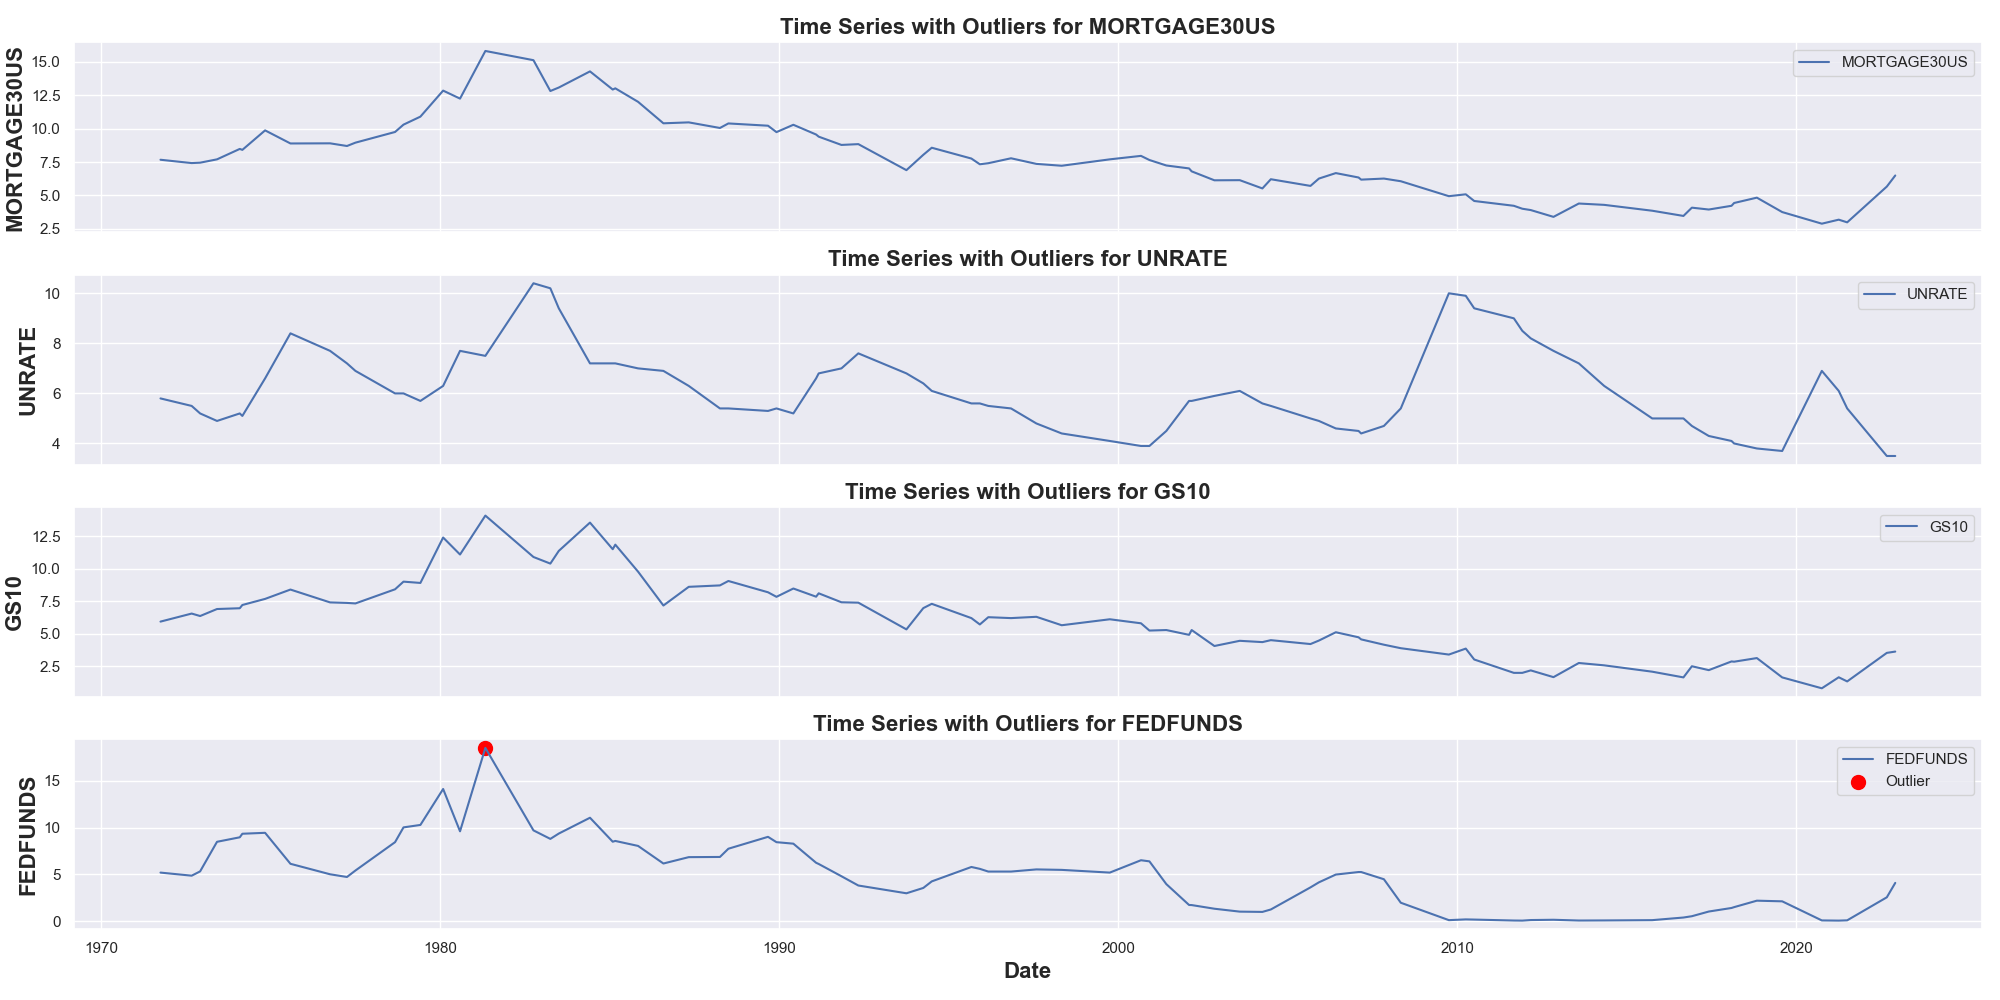
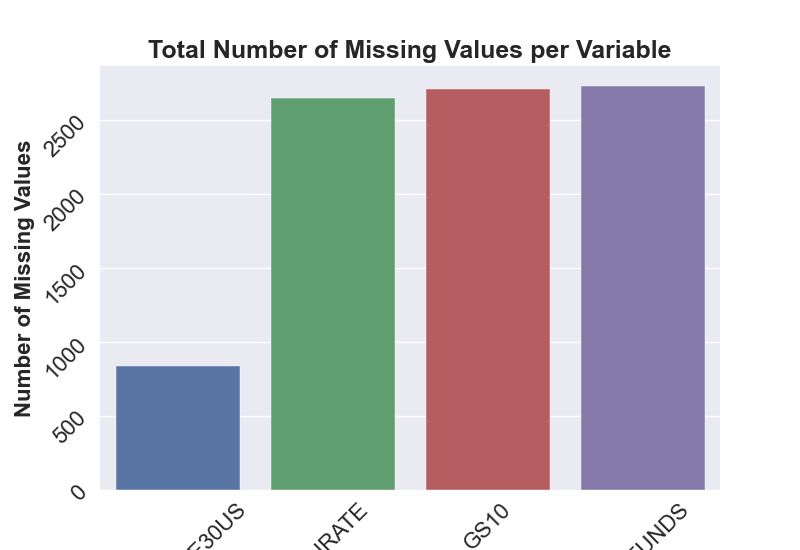
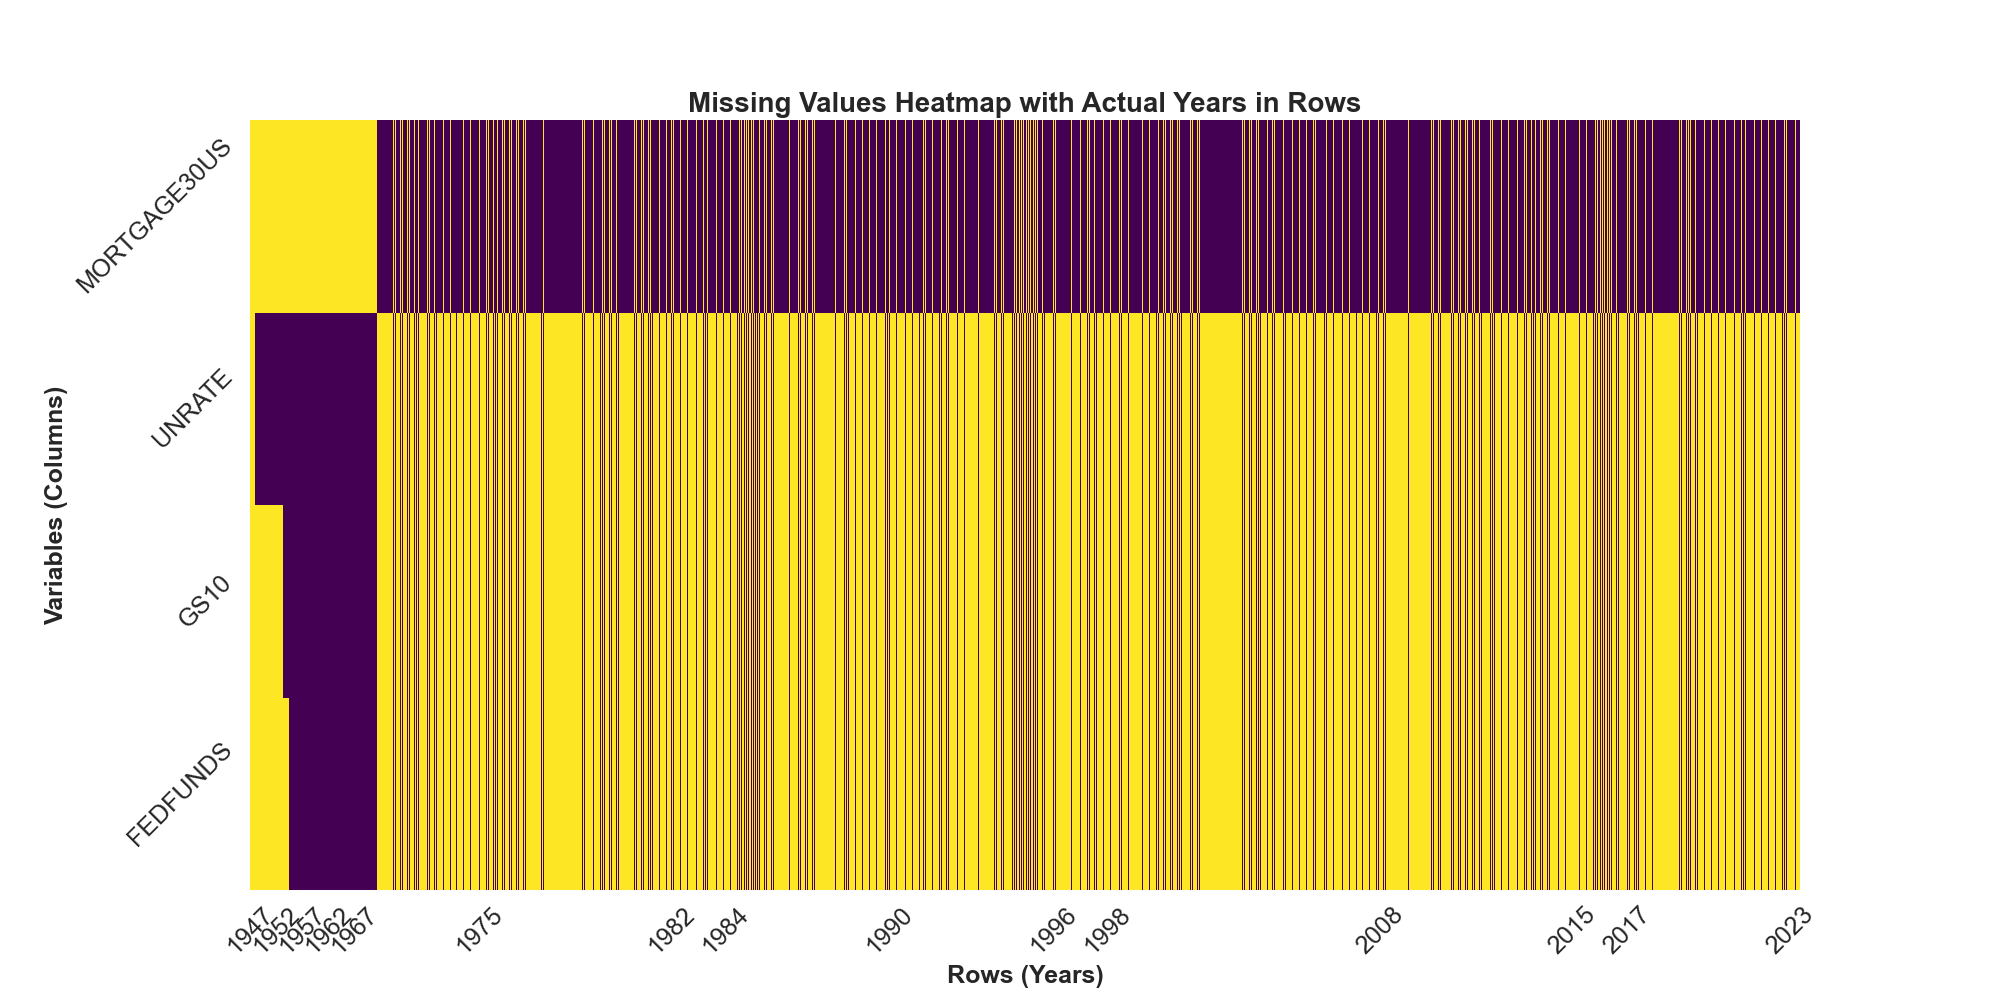
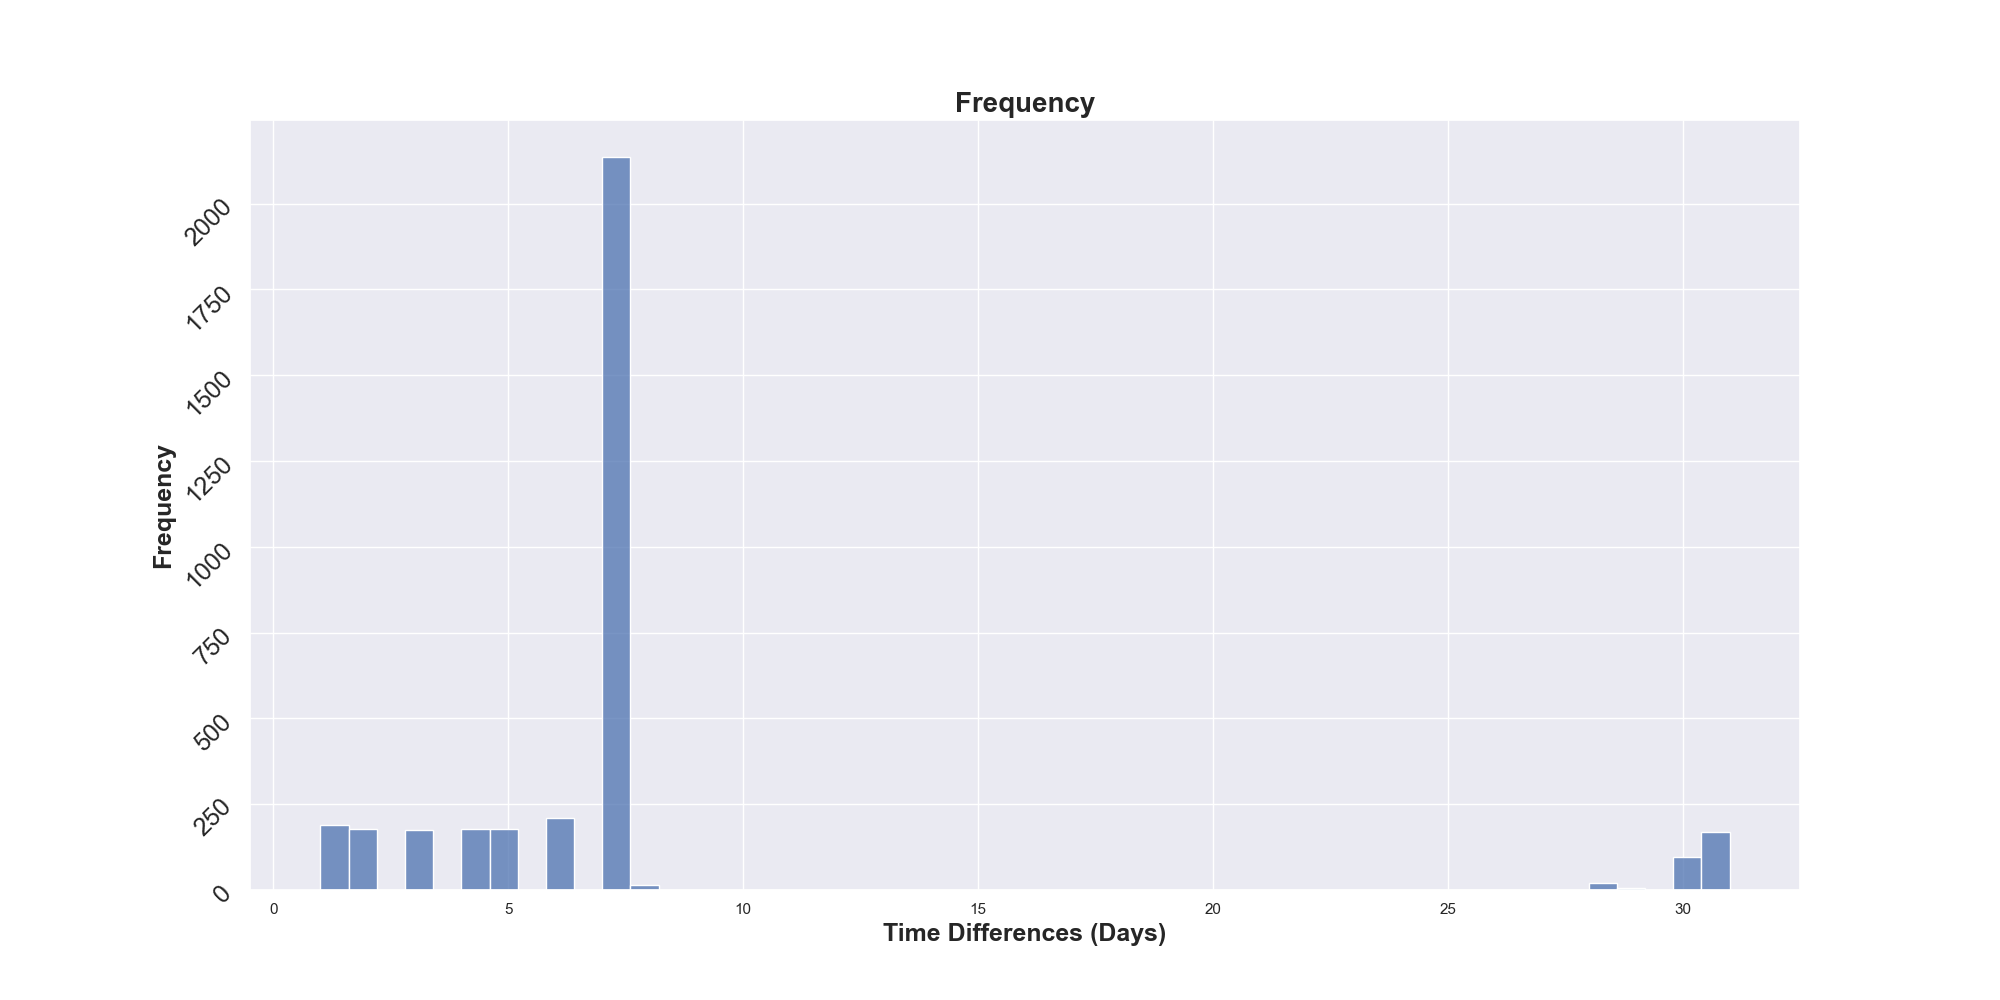

In [8]:
config={
    "time_series_outliers": {
        "zscore_threshold": 3,

    },
    "time_series_missing_values":{
        "min_threshold": 2,
    }
}

plan = vm.run_test_plan("time_series_data_quality", dataset=vm_dataset, config=config)

Handling Frequencies.

In [9]:
def identify_frequencies(df):
    """
    Identify the frequency of each series in the DataFrame.

    :param df: Time-series DataFrame
    :return: DataFrame with two columns: 'Variable' and 'Frequency'
    """
    frequencies = []
    for column in df.columns:
        series = df[column].dropna()
        if not series.empty:
            freq = pd.infer_freq(series.index)
            if freq == 'MS' or freq == 'M':
                label = 'Monthly'
            elif freq == 'Q':
                label = 'Quarterly'
            elif freq == 'A':
                label = 'Yearly'
            else:
                label = freq
        else:
            label = None

        frequencies.append({'Variable': column, 'Frequency': label})

    freq_df = pd.DataFrame(frequencies)

    return freq_df

In [10]:
frequencies = identify_frequencies(raw_df)
display(frequencies)

Variable Frequency
0  MORTGAGE30US      None
1        UNRATE   Monthly
2          GS10   Monthly
3      FEDFUNDS   Monthly

Resample.

In [11]:
preprocessed_df = raw_df.resample('MS').last()
frequencies = identify_frequencies(preprocessed_df)
display(frequencies)

Variable Frequency
0  MORTGAGE30US   Monthly
1        UNRATE   Monthly
2          GS10   Monthly
3      FEDFUNDS   Monthly

Run Data Quality Test Plan.

Pandas dataset detected. Initializing VM Dataset instance...
Inferring dataset types...



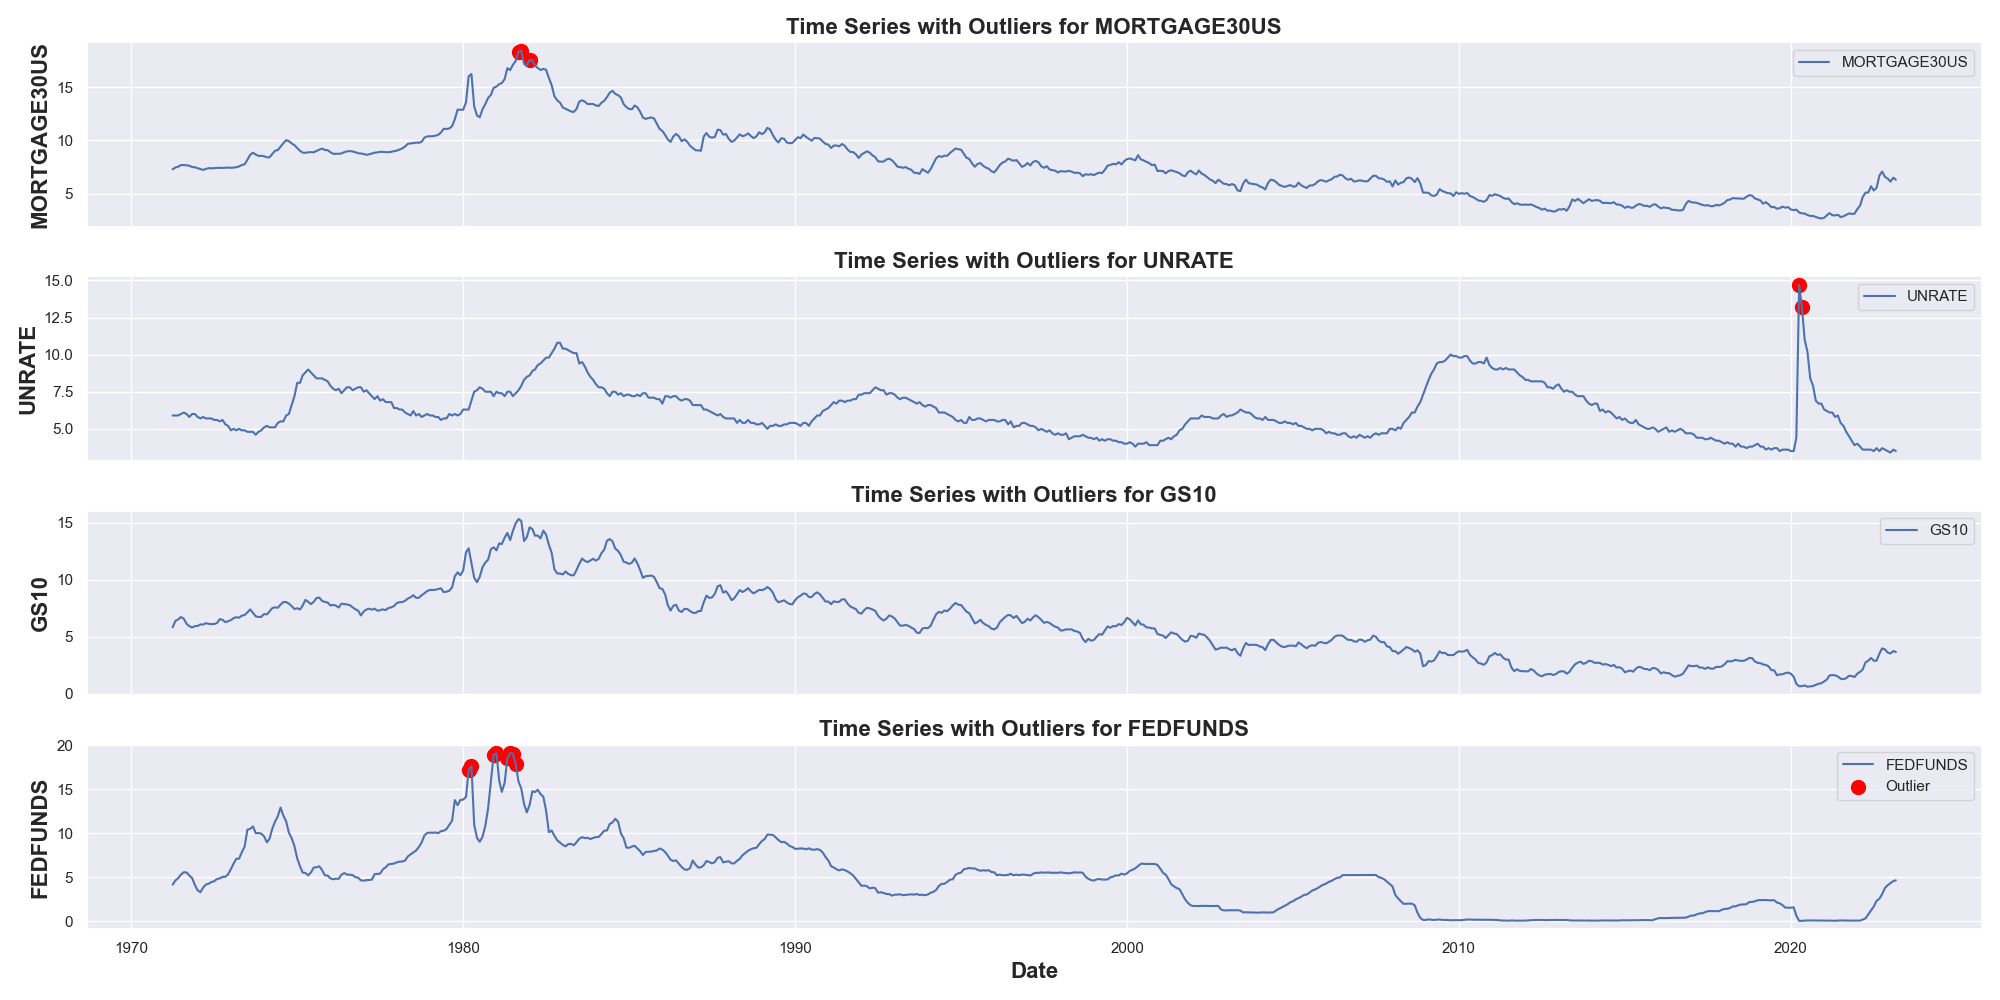
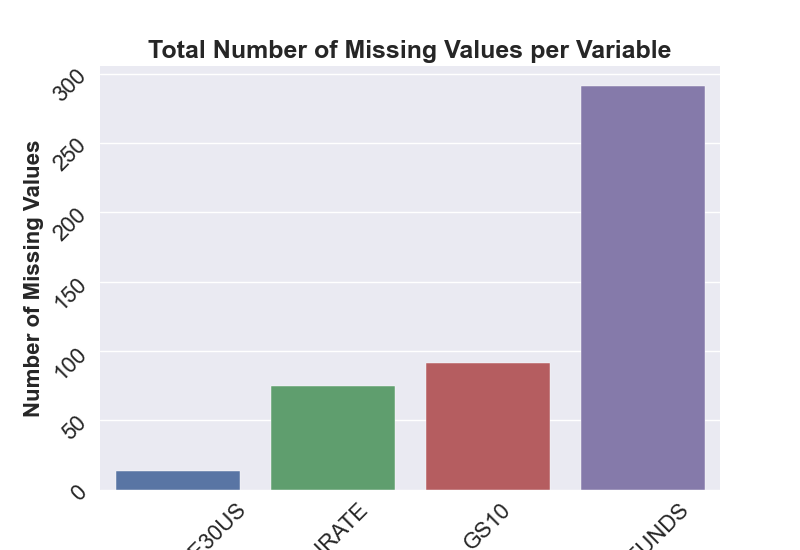
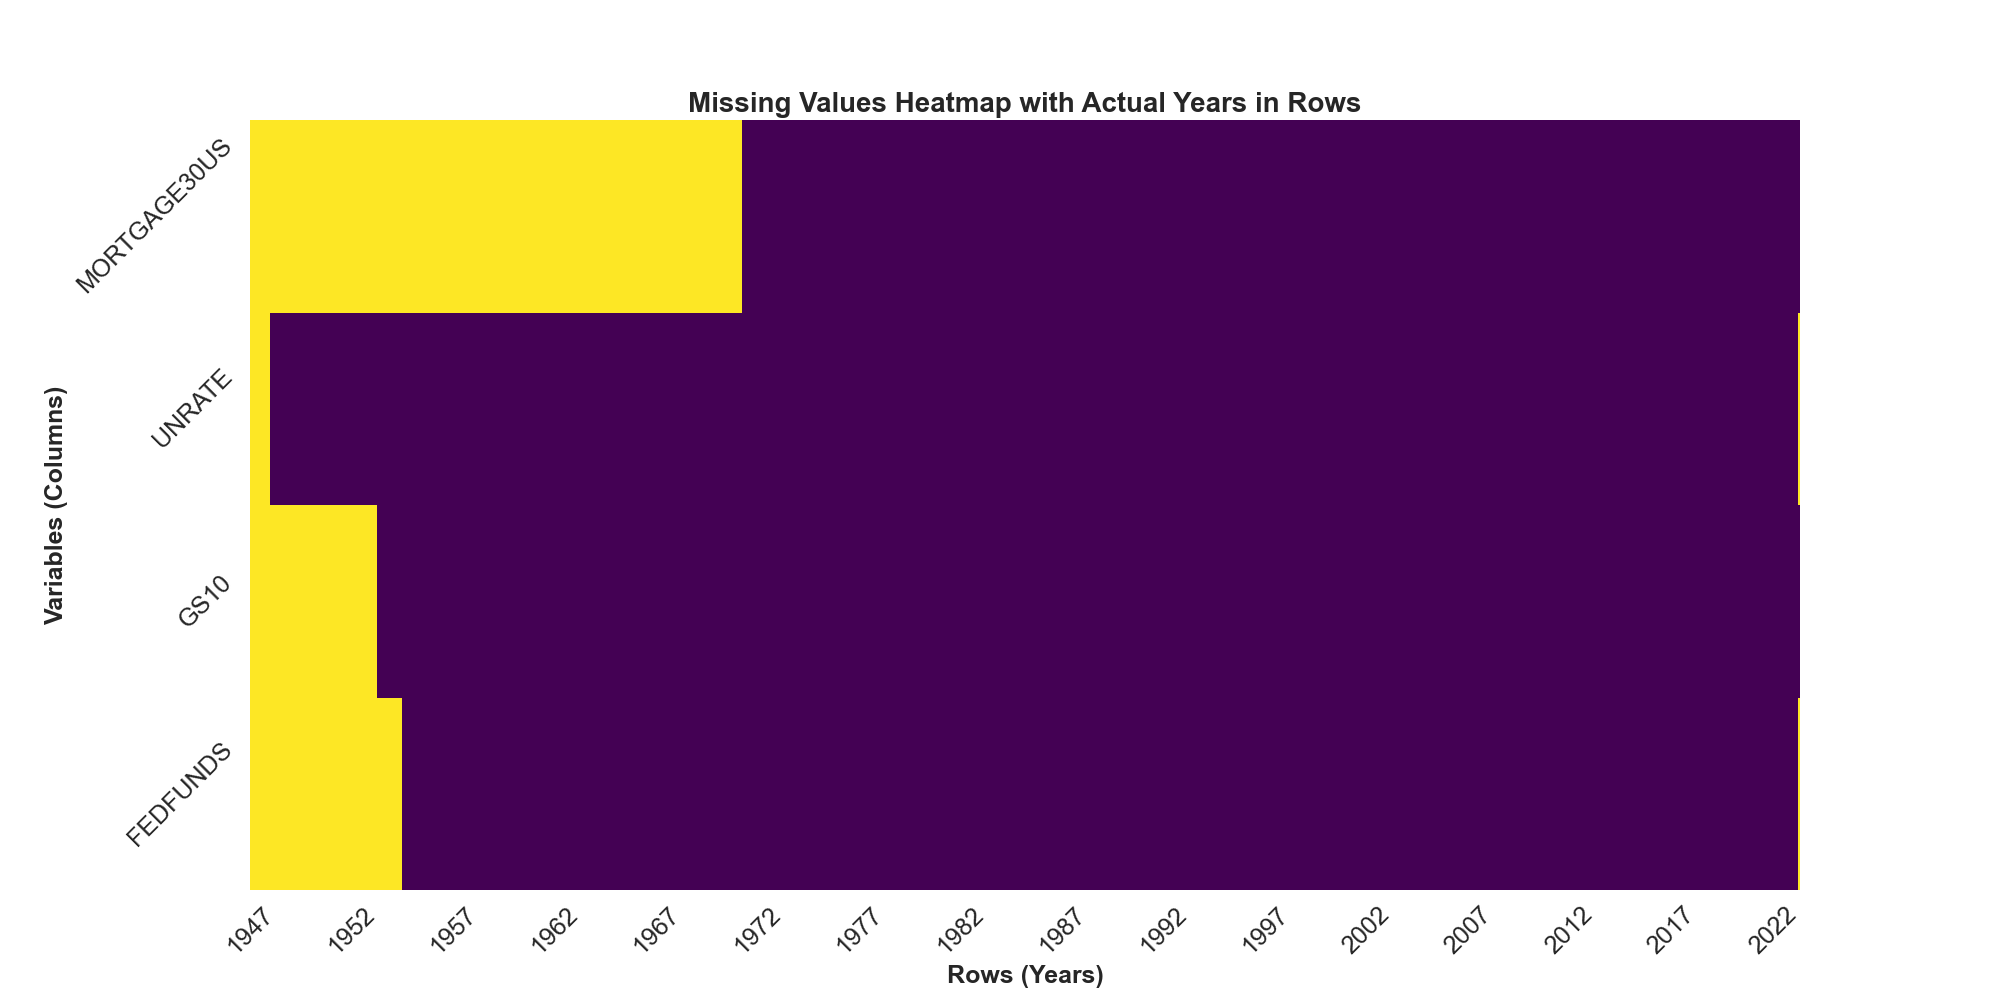

In [12]:
vm_dataset = vm.init_dataset(
    dataset=preprocessed_df,
    target_column="MORTGAGE30US"
)
plan = vm.run_test_plan("time_series_data_quality", dataset=vm_dataset, config=config)

Remove missing values.

In [13]:
preprocessed_df = preprocessed_df.dropna()

Run Data Quality Test Plan. 

Pandas dataset detected. Initializing VM Dataset instance...
Inferring dataset types...



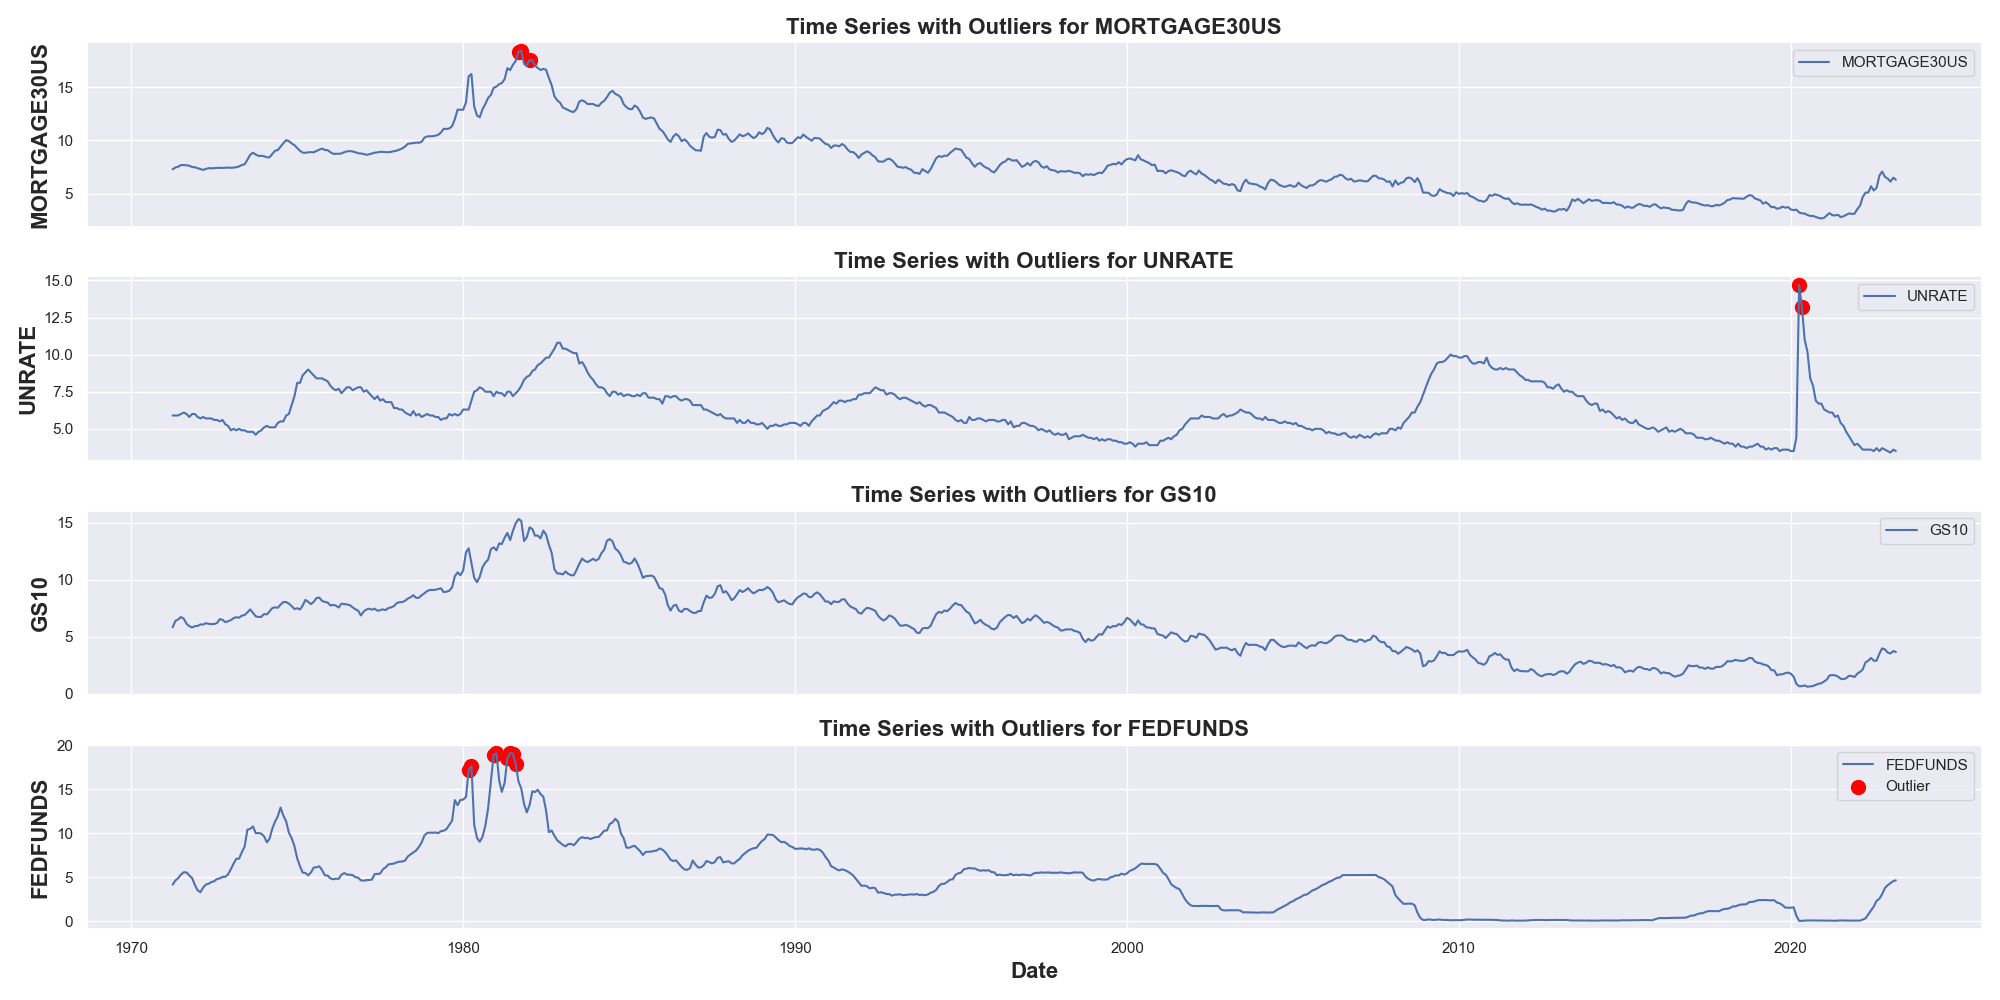

In [14]:
vm_dataset = vm.init_dataset(
    dataset=preprocessed_df,
    target_column="MORTGAGE30US"
)
plan = vm.run_test_plan("time_series_data_quality", dataset=vm_dataset, config=config)

## Exploratory Data Analysis

### Univariate Analysis

#### Run Time Series Univariate Test Plan

In [15]:
vm.test_plans.describe_plan("time_series_univariate")

'<table>\n<thead>\n<tr><th>Attribute       </th><th>Value                                                                                                        </th></tr>\n</thead>\n<tbody>\n<tr><td>ID              </td><td>time_series_univariate                                                                                       </td></tr>\n<tr><td>Name            </td><td>TimeSeriesUnivariate                                                                                         </td></tr>\n<tr><td>Description     </td><td>Test plan to perform time series univariate analysis.                                                        </td></tr>\n<tr><td>Required Context</td><td>[&#x27;dataset&#x27;]                                                                                                  </td></tr>\n<tr><td>Tests           </td><td>TimeSeriesLinePlot (Metric), TimeSeriesHistogram (Metric), ACFandPACFPlot (Metric), RollingStatsPlot (Metric)</td></tr>\n<tr><td>Test Plans      </td><td>[]                                                                                                           </td></tr>\n</tbody>\n</table>'

Pandas dataset detected. Initializing VM Dataset instance...
Inferring dataset types...


Running Metric: acf_pacf_plot:  50%|█████     | 2/4 [00:00<00:00,  5.01it/s]        The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



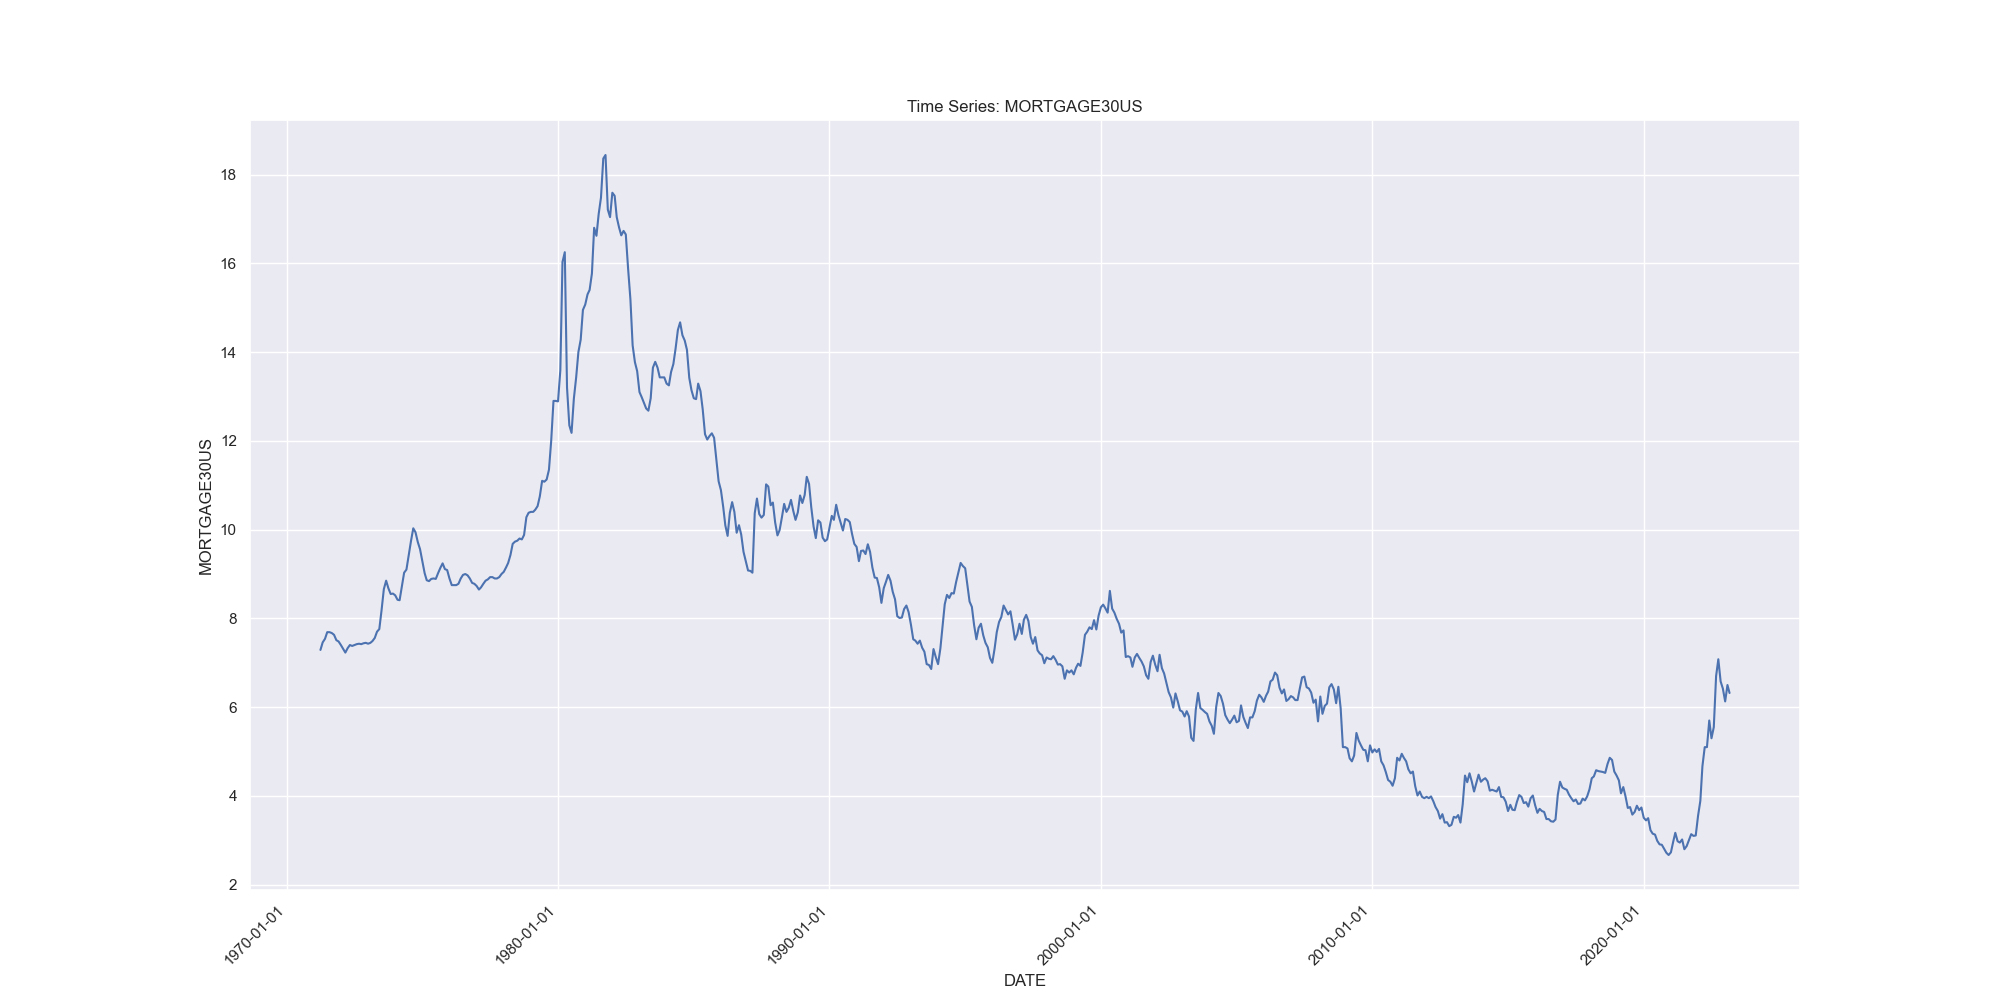
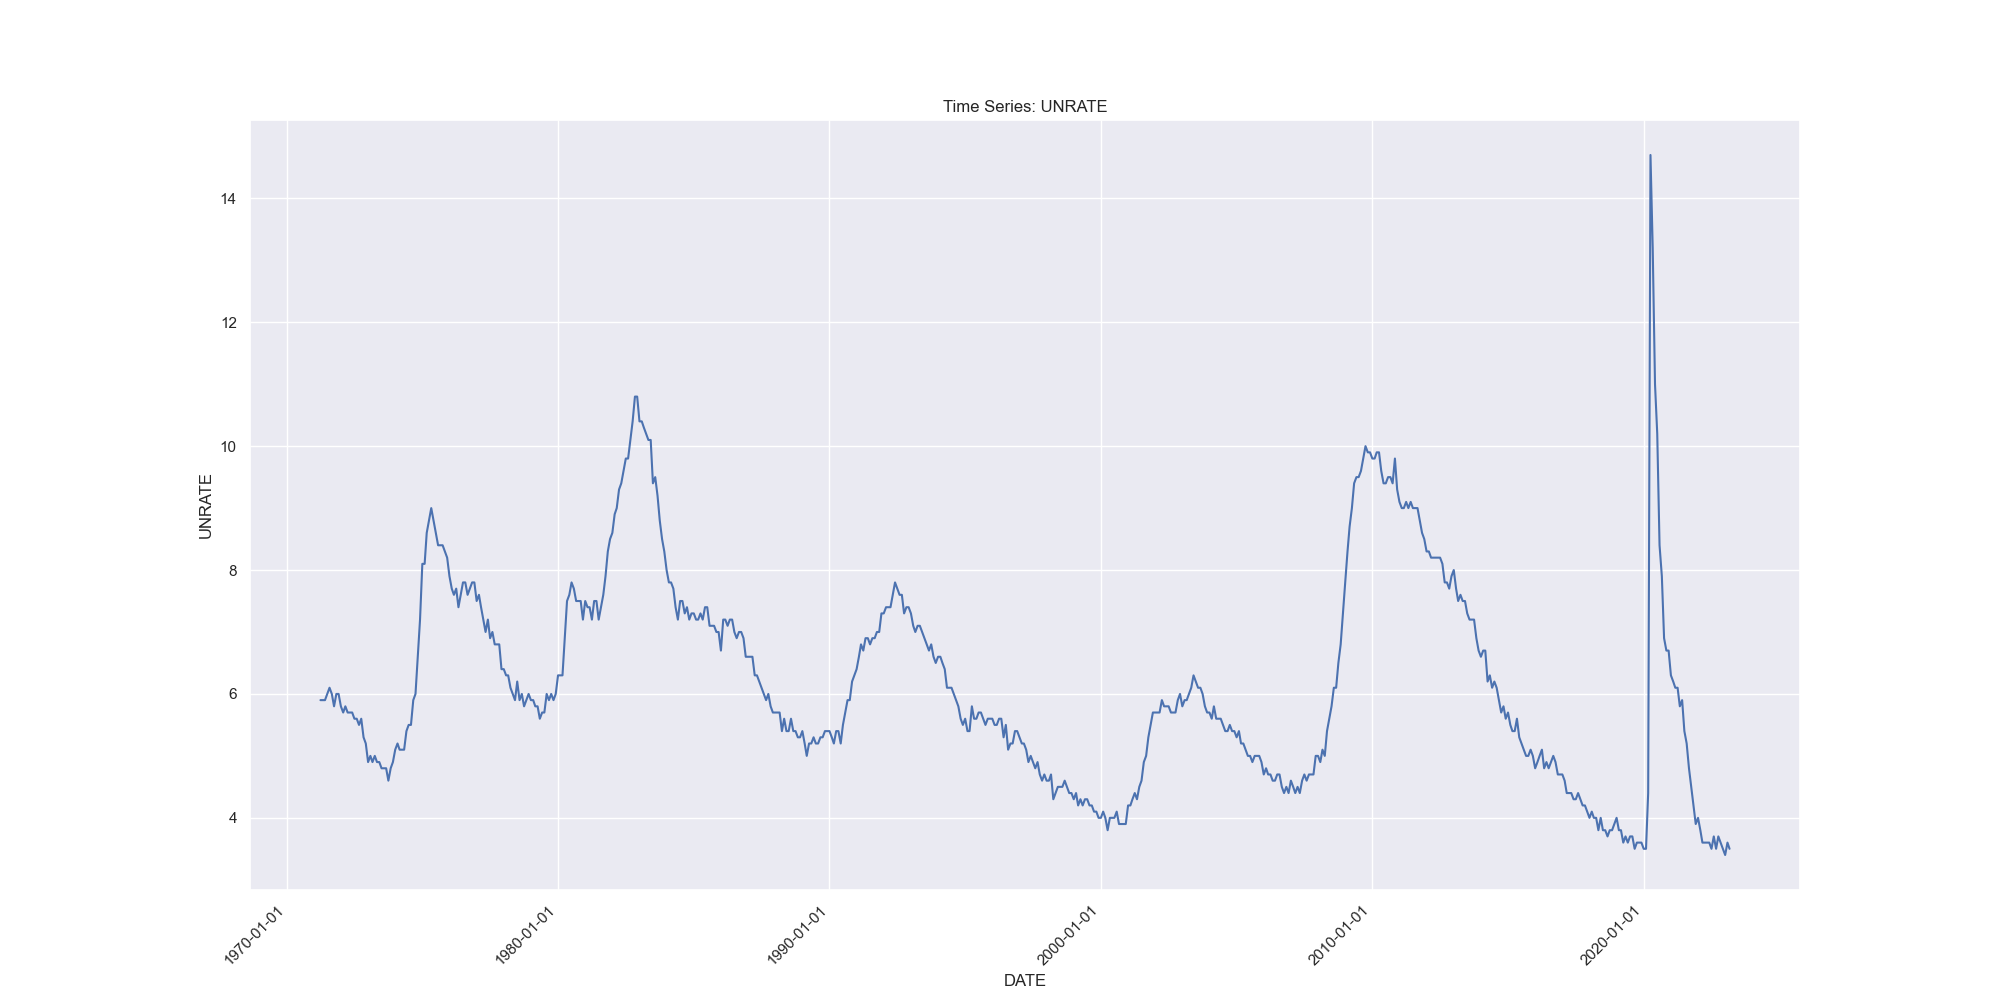
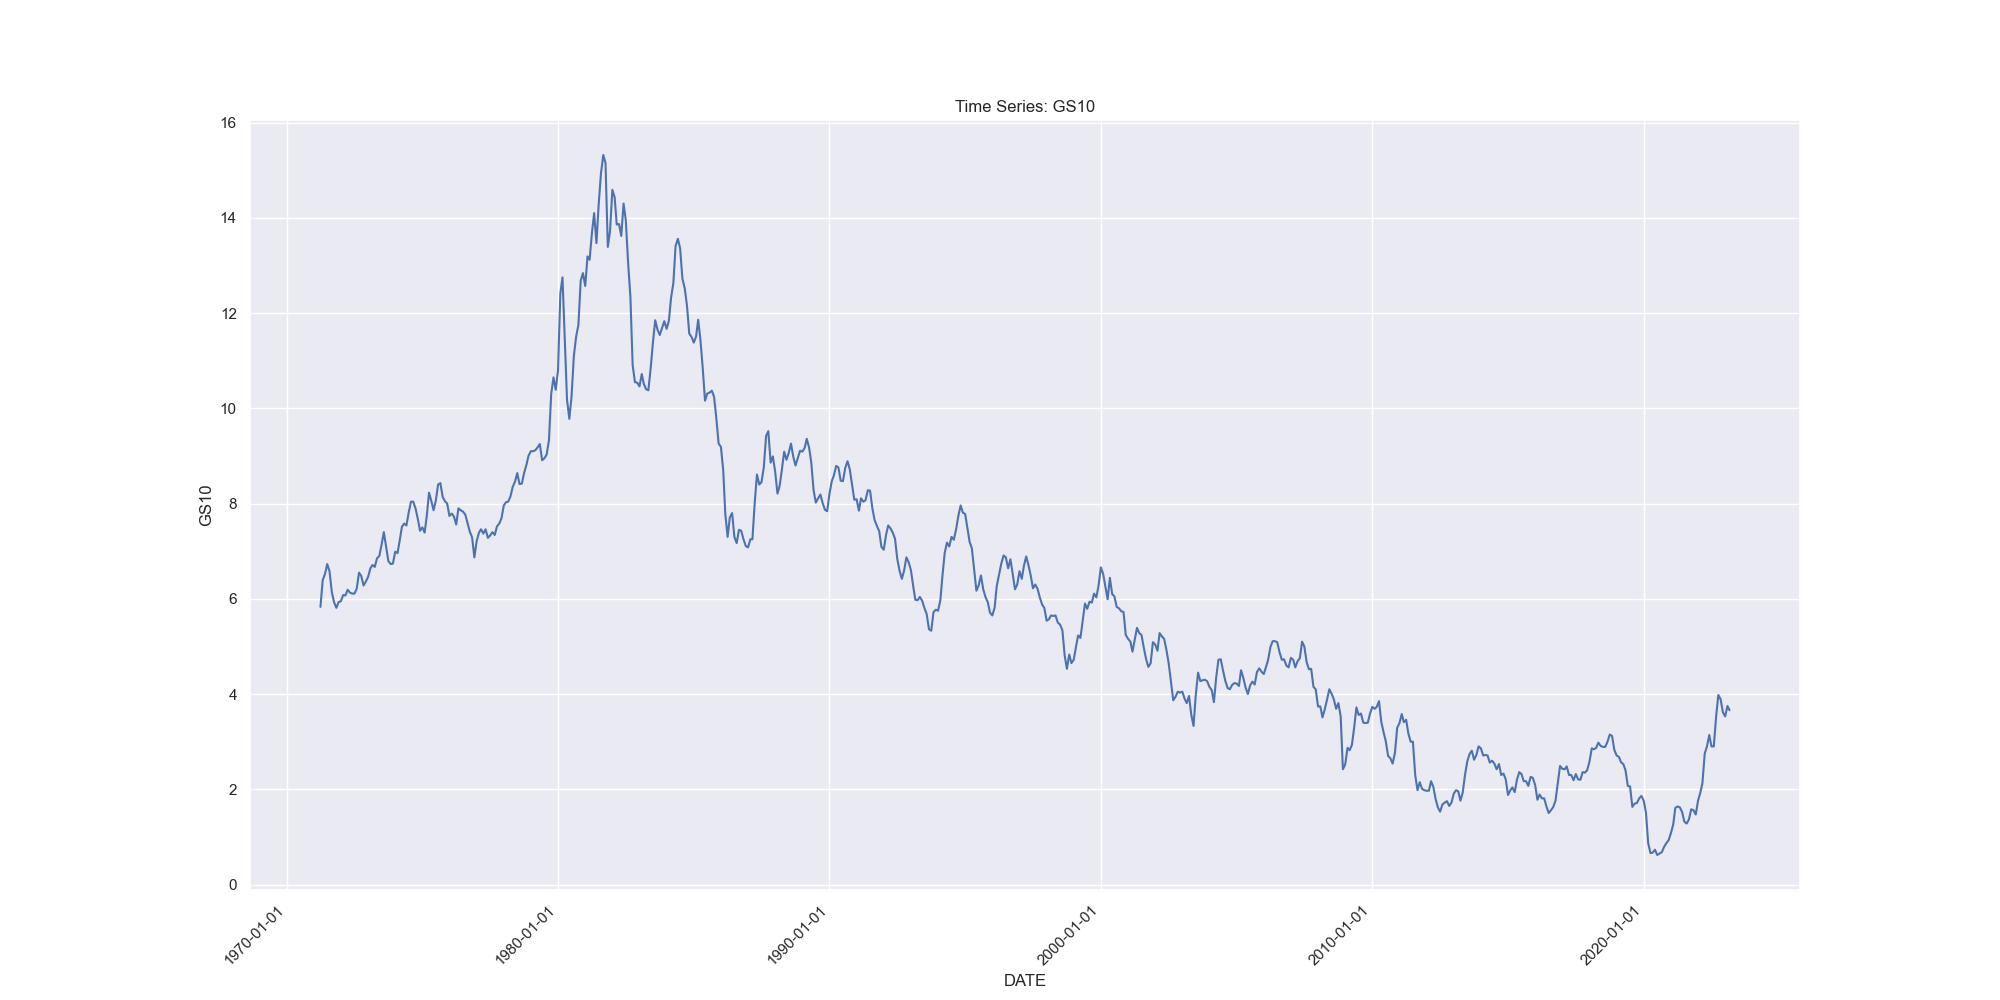
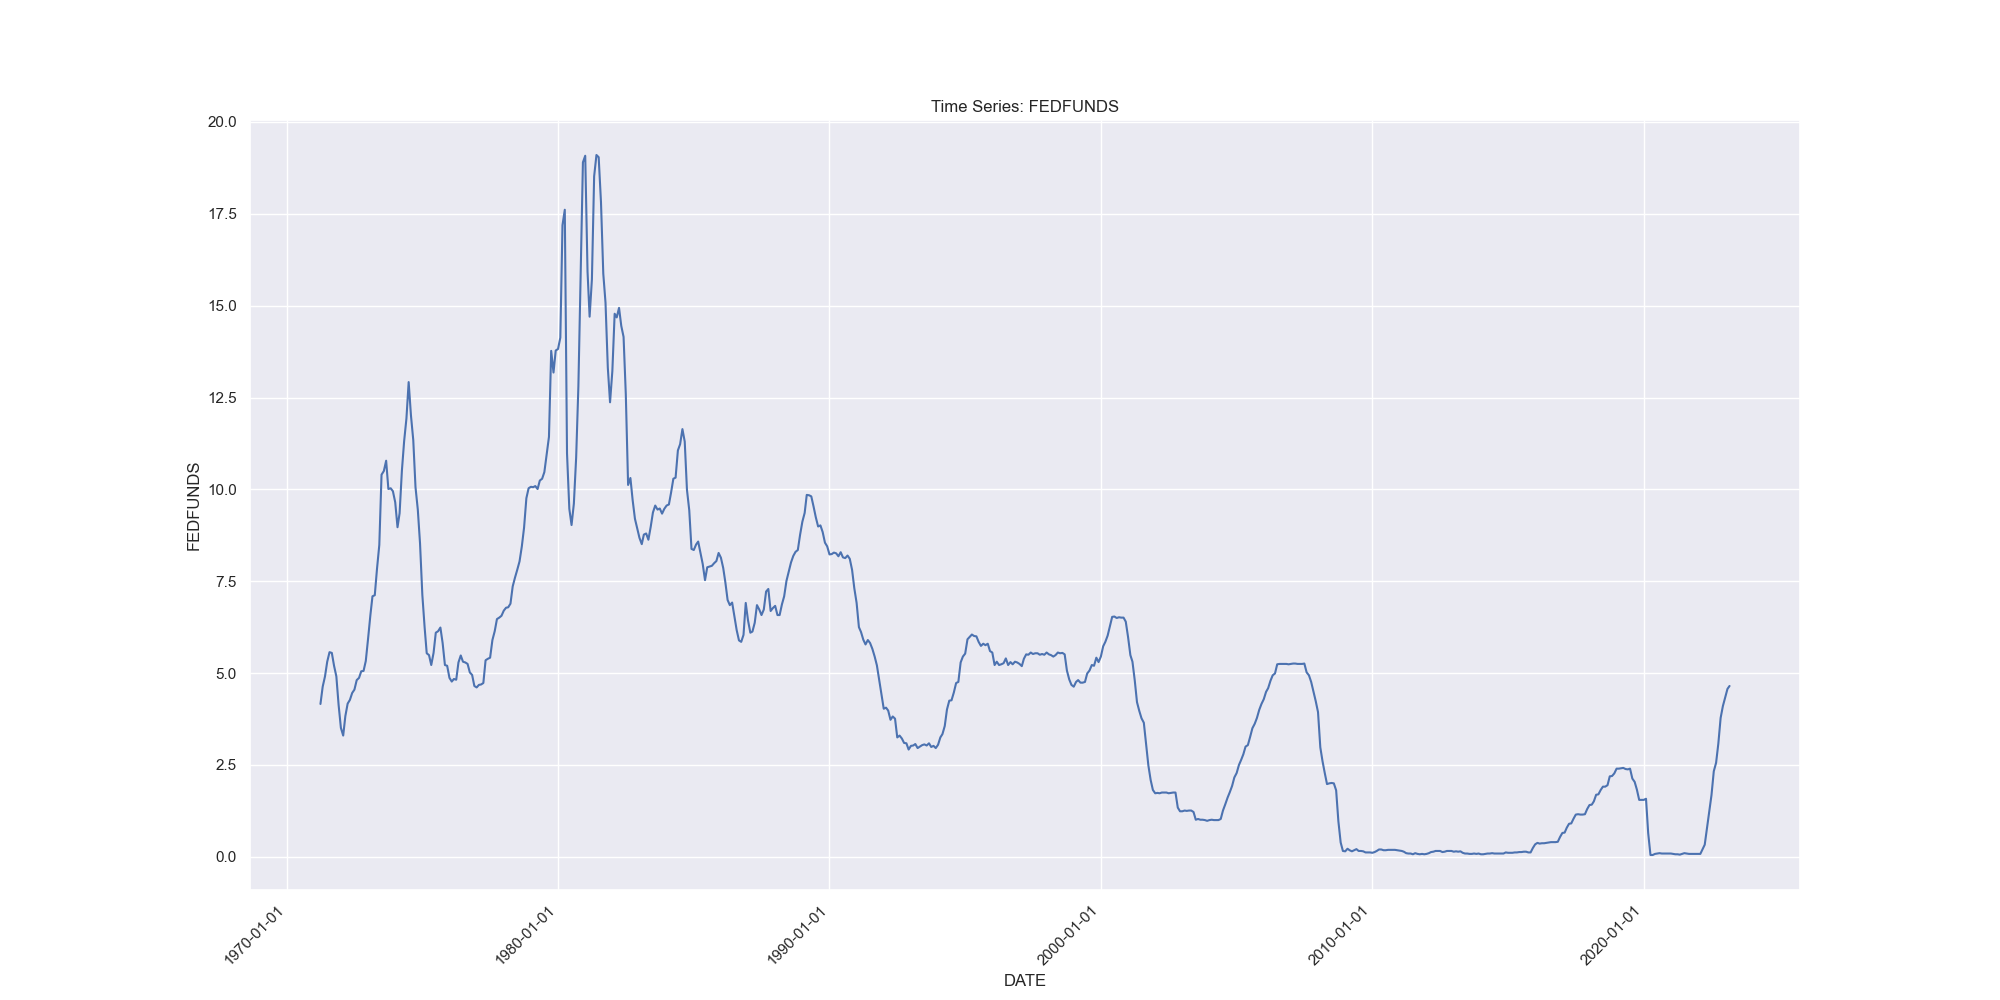
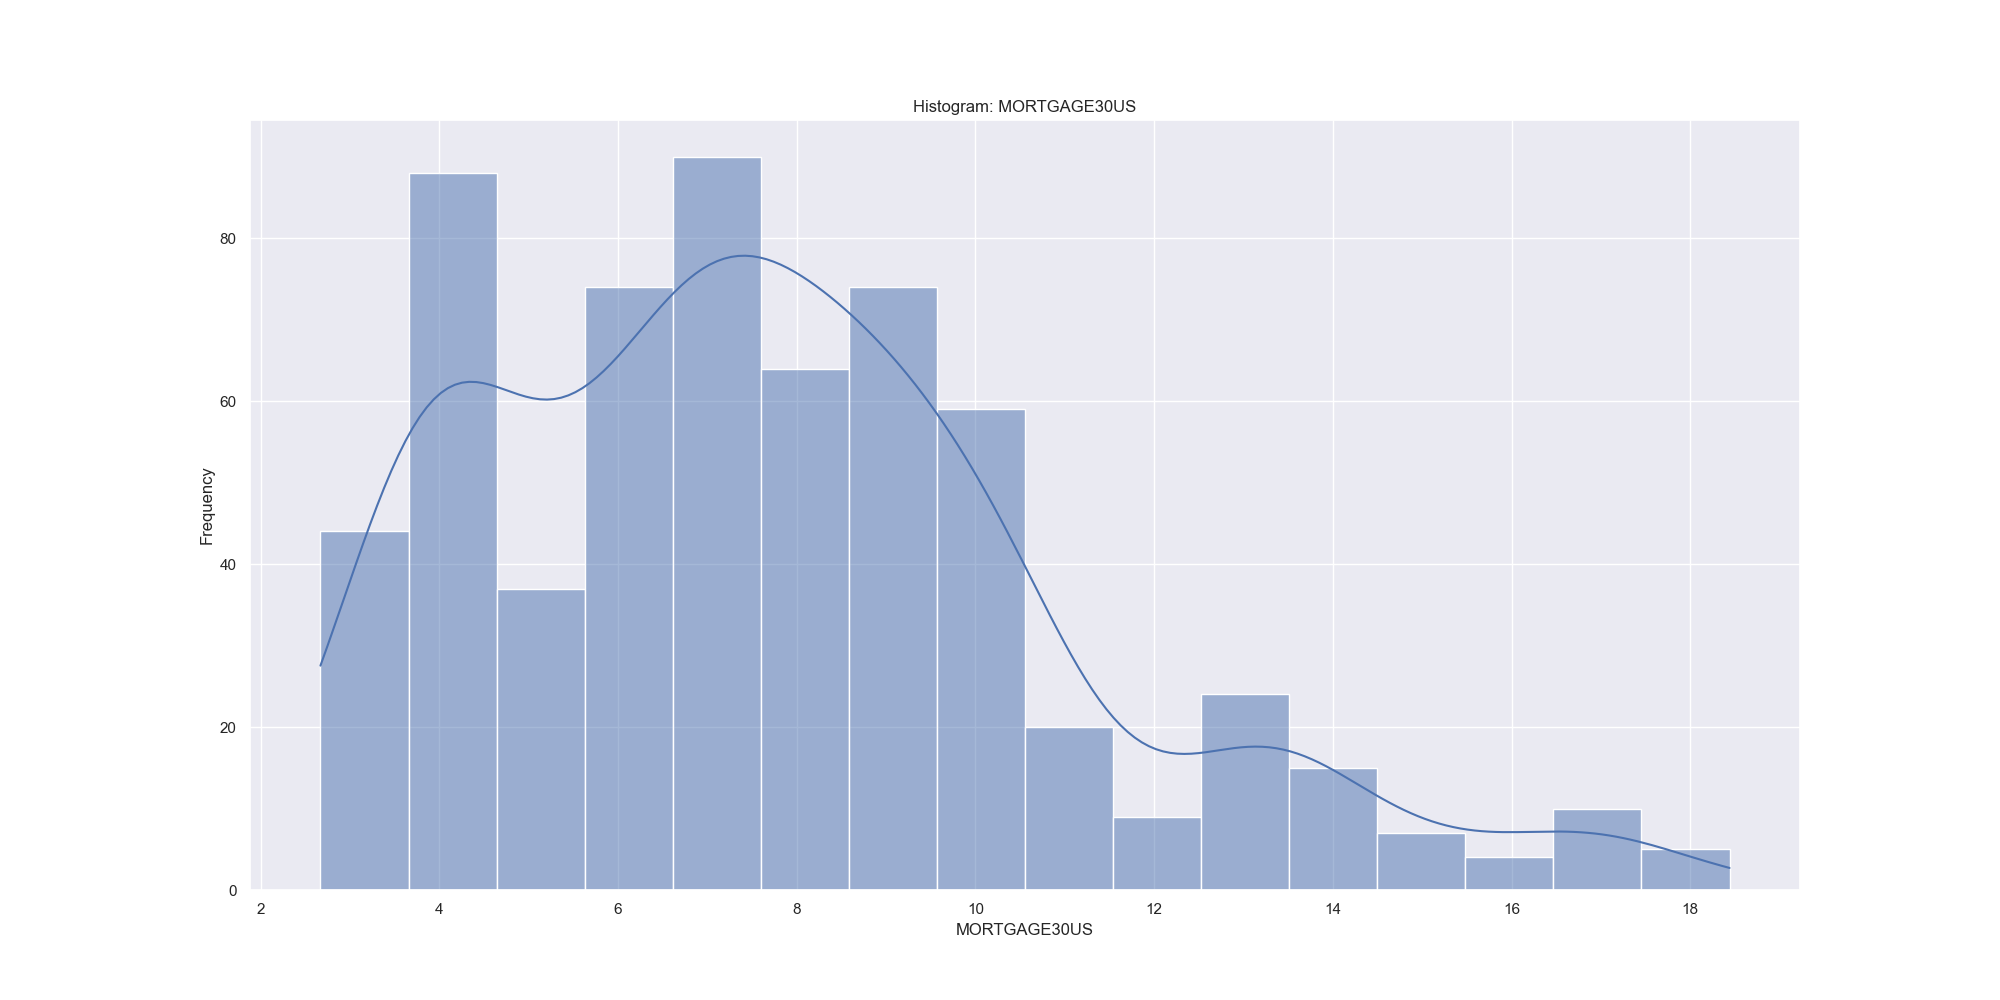
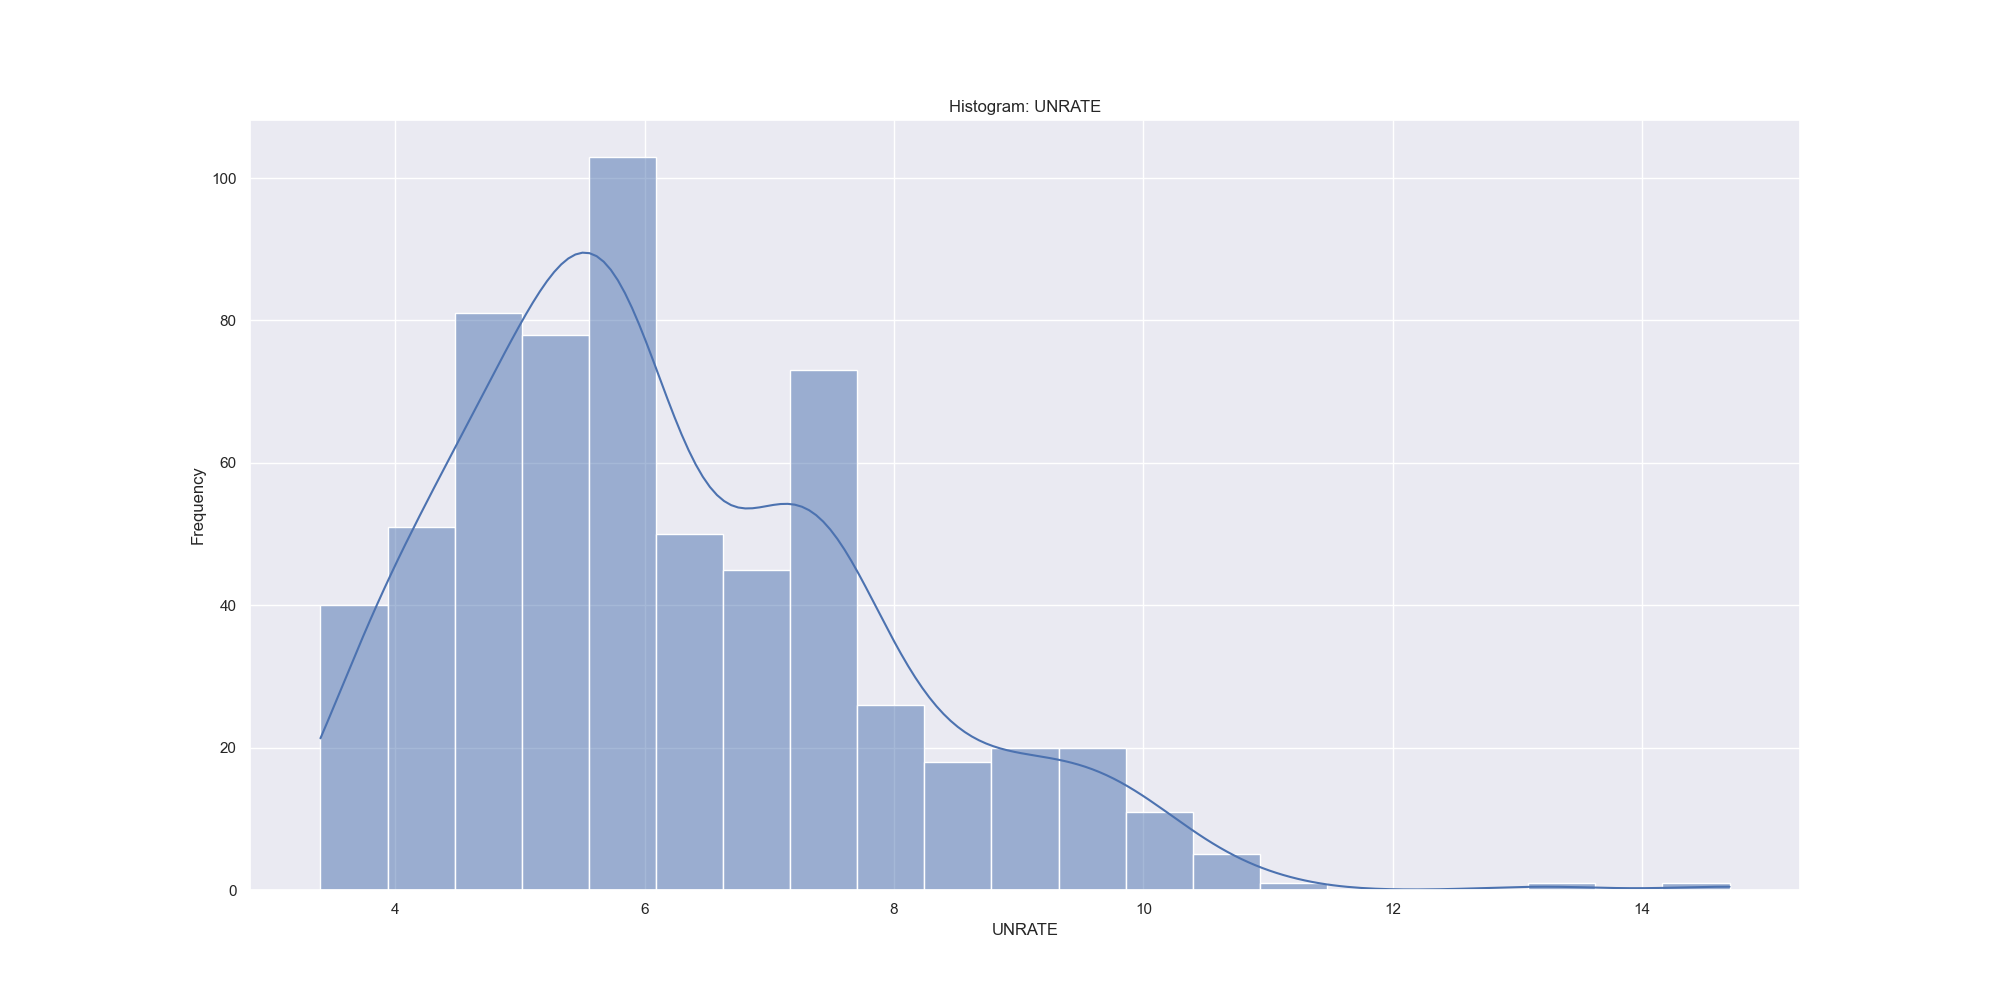
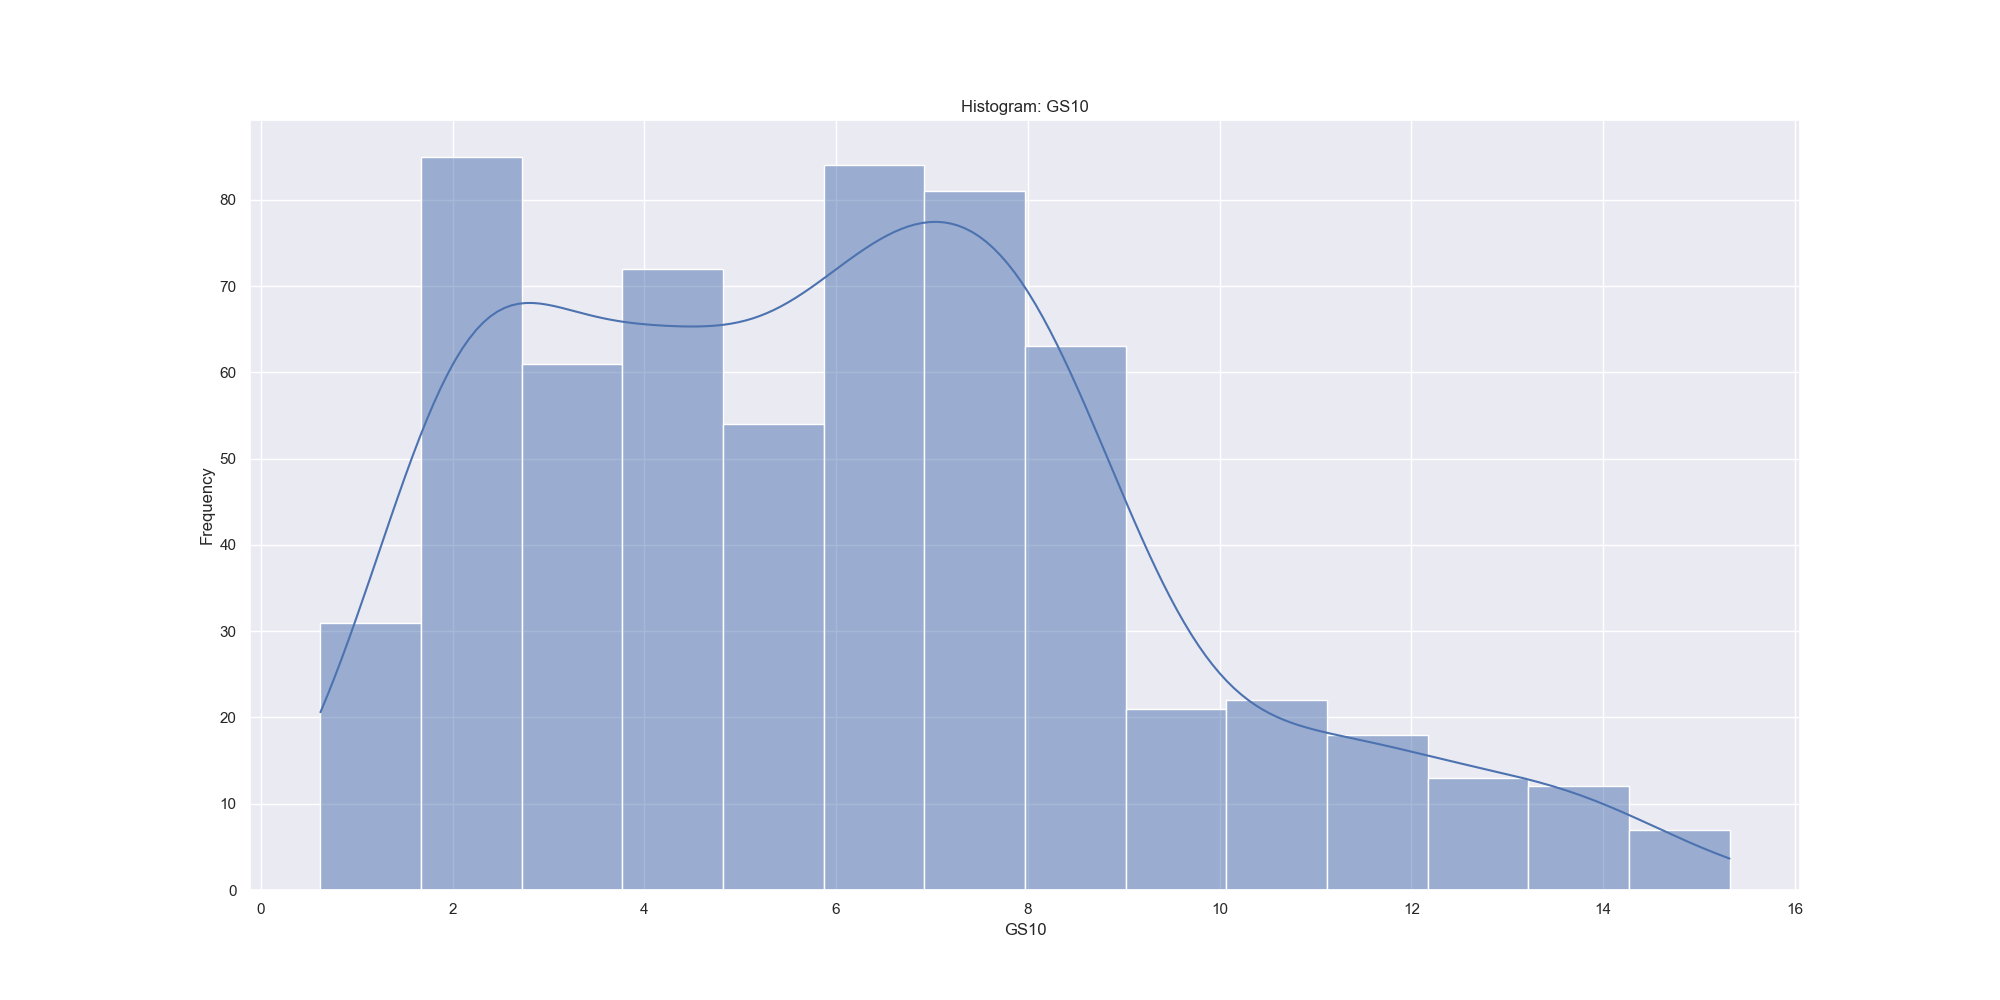
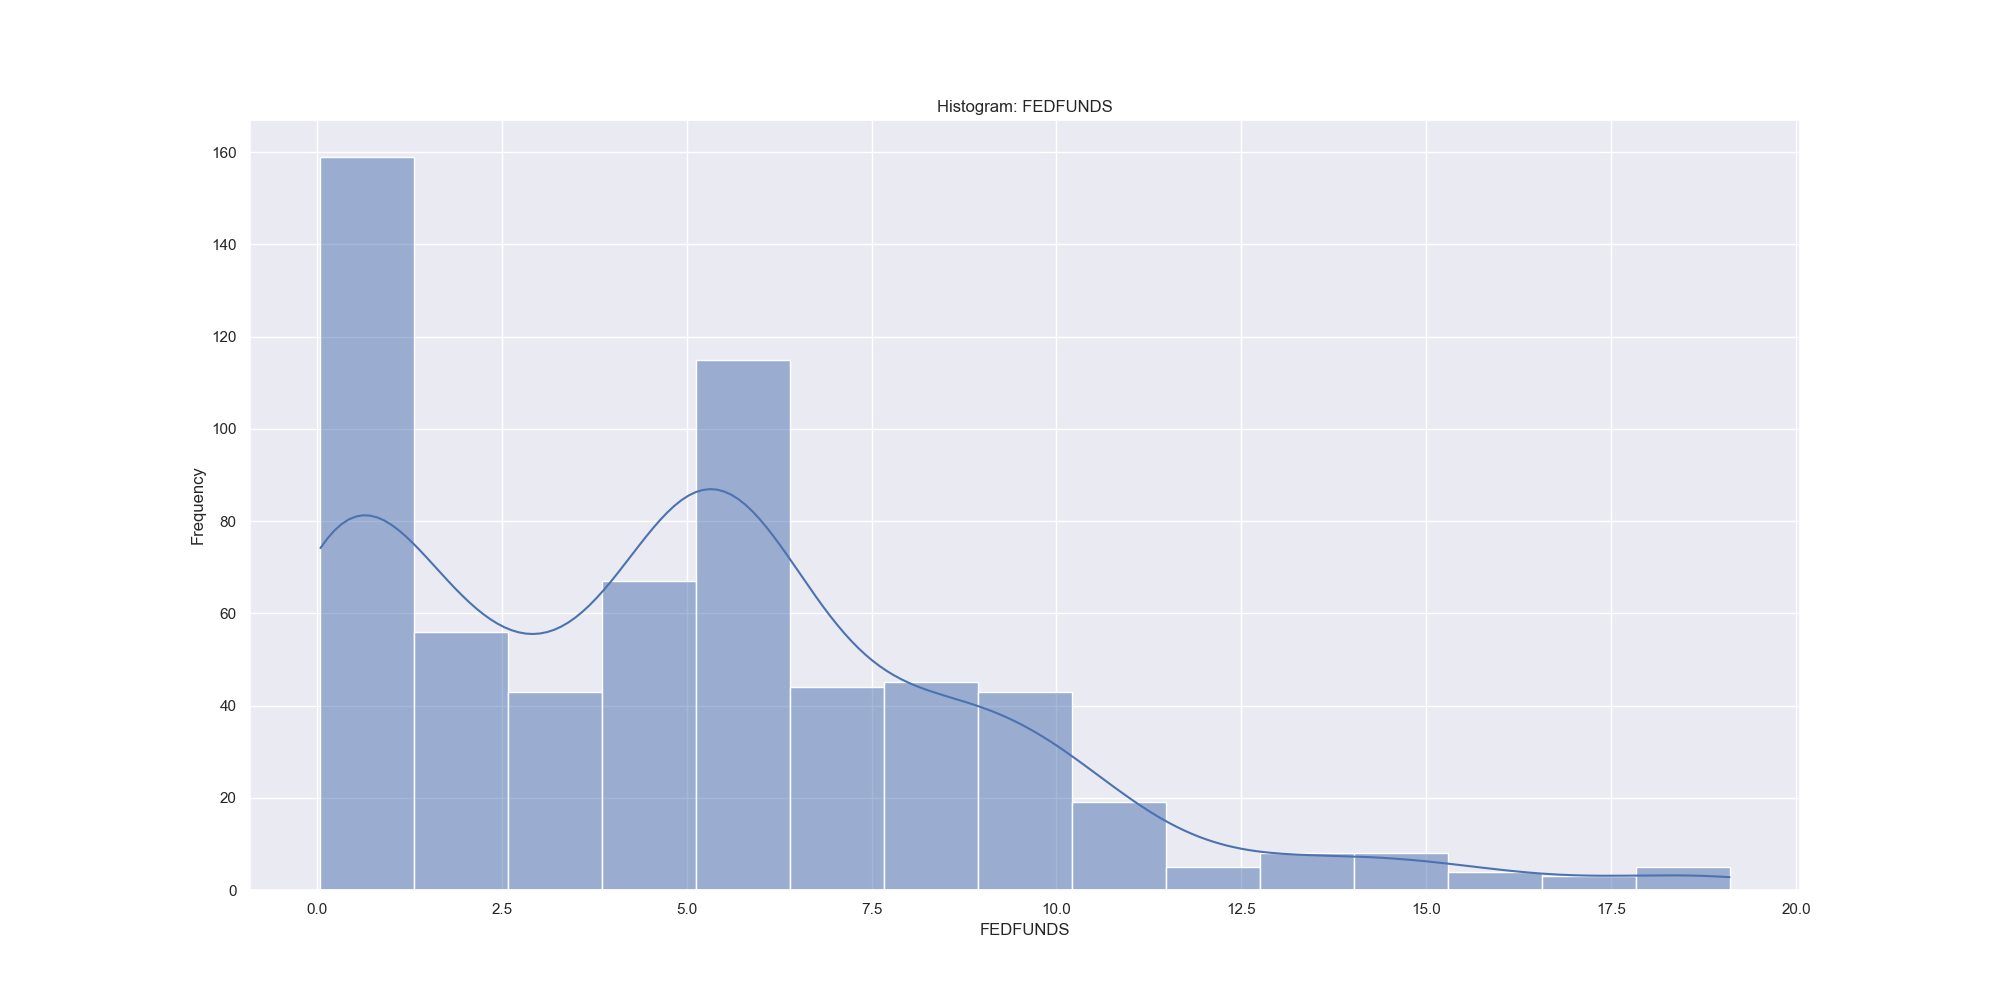
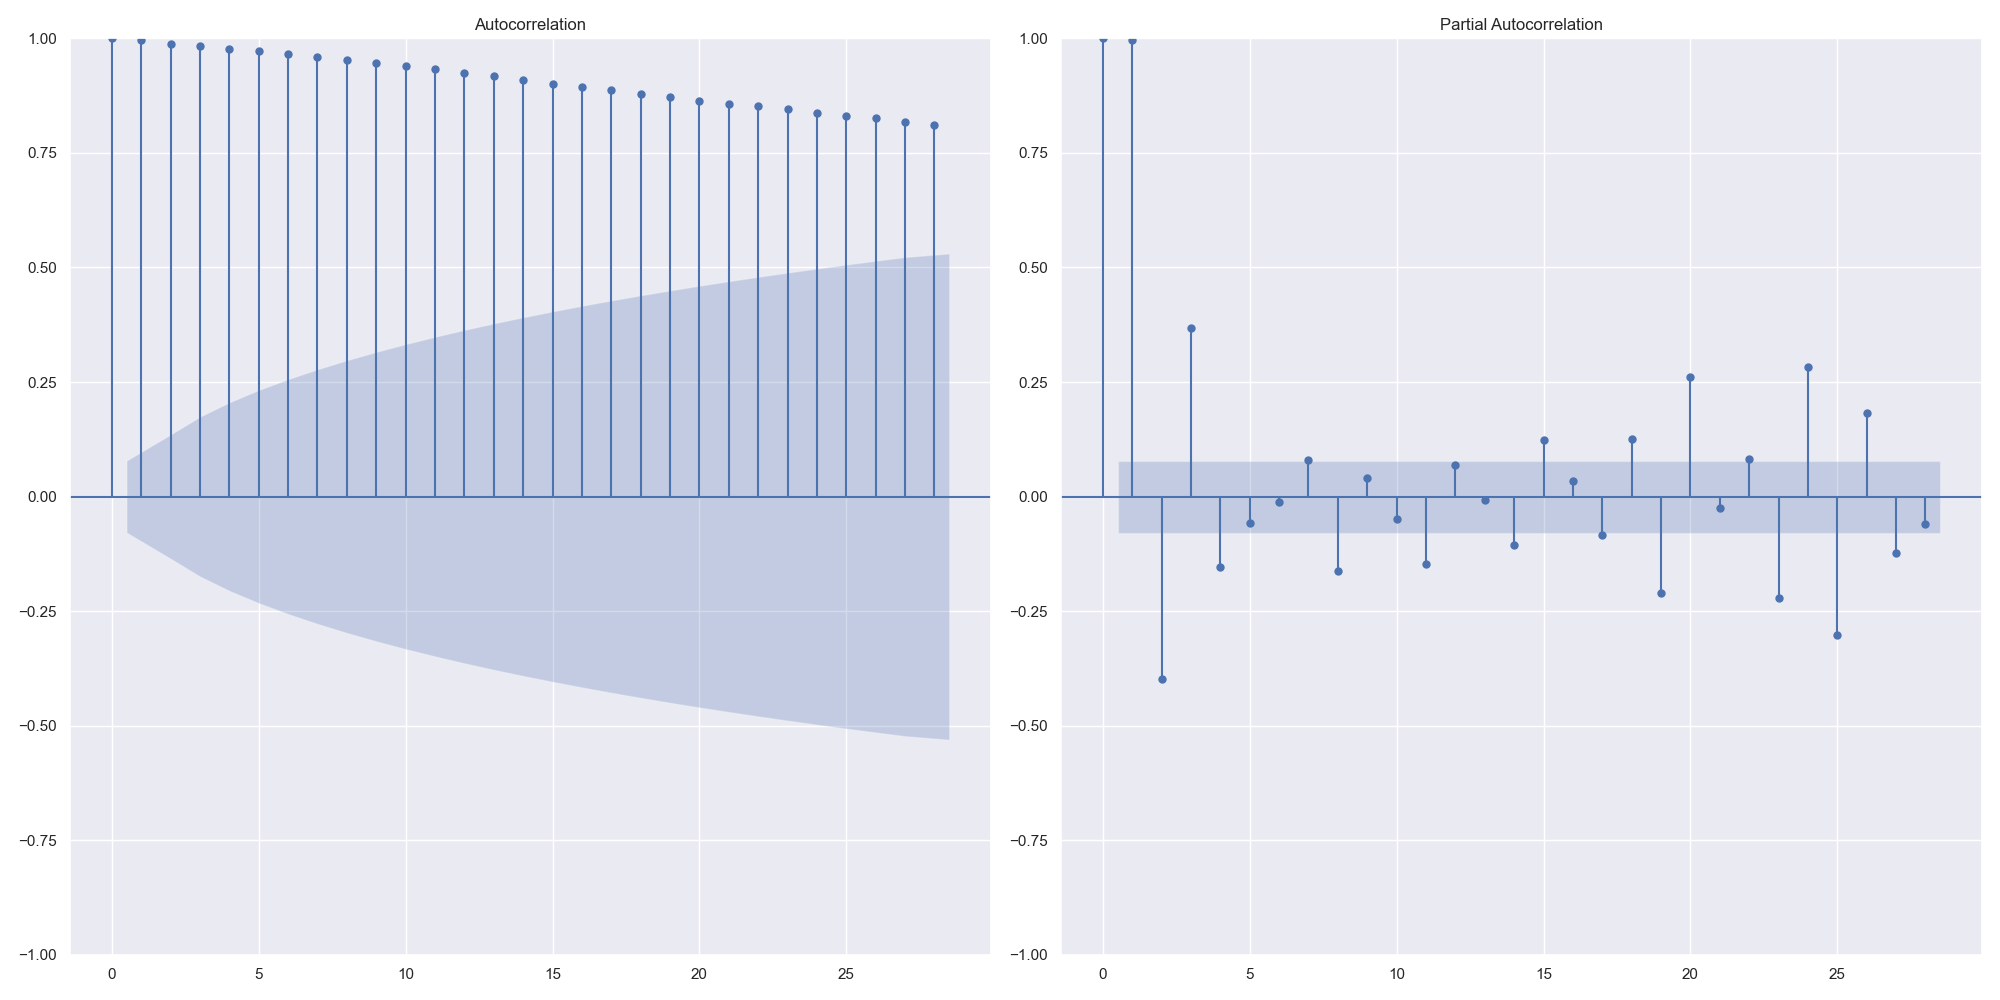
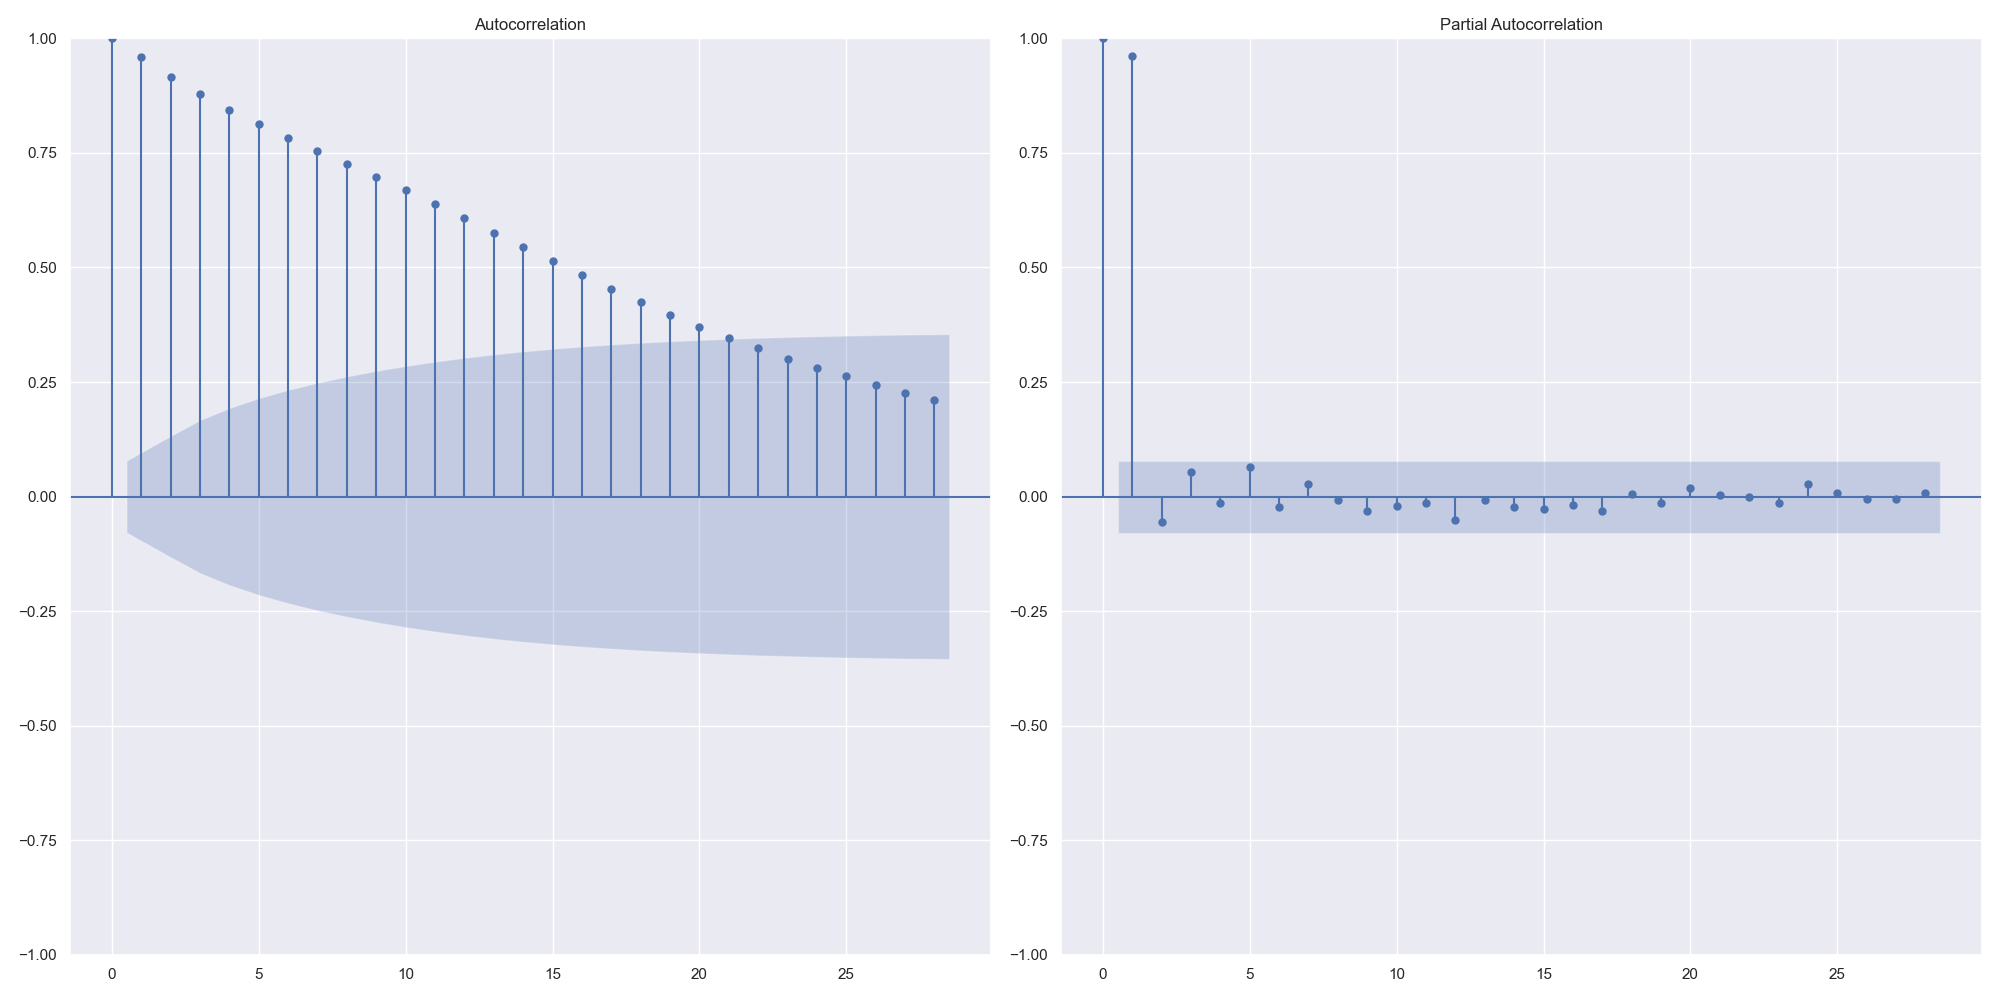
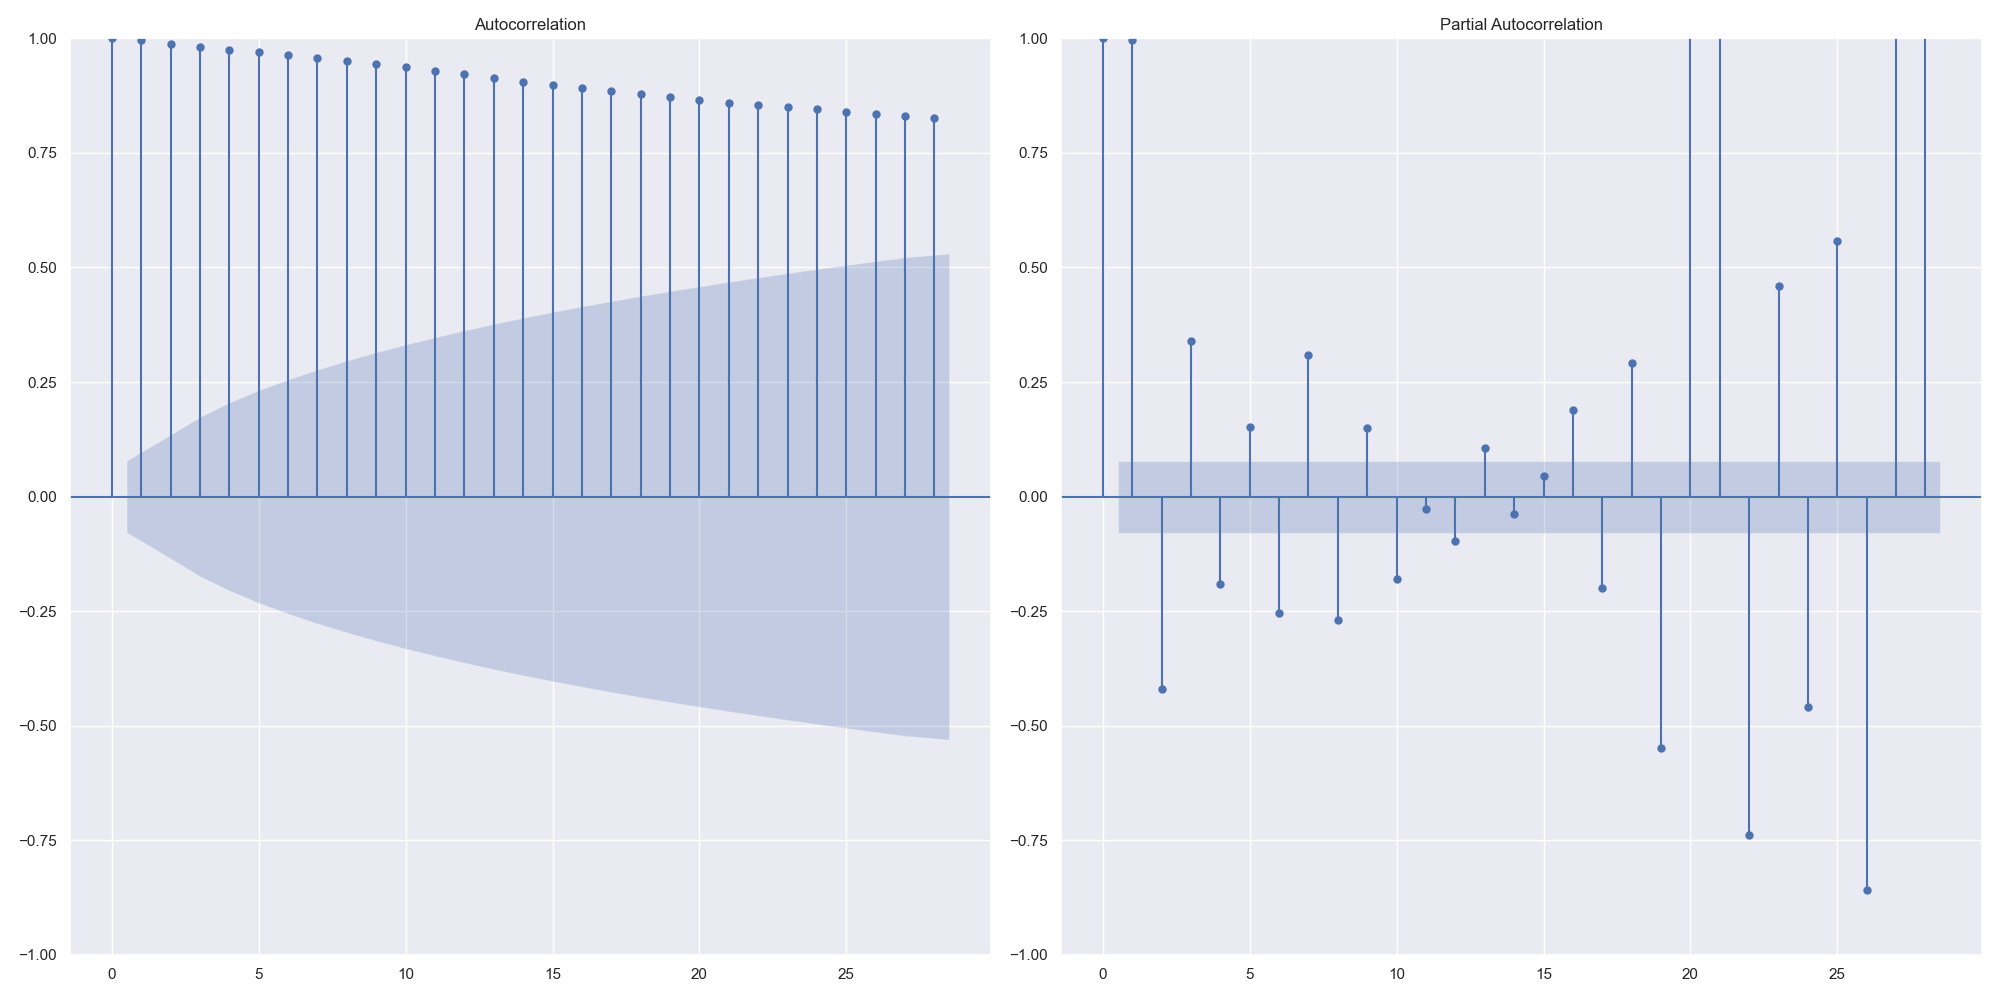
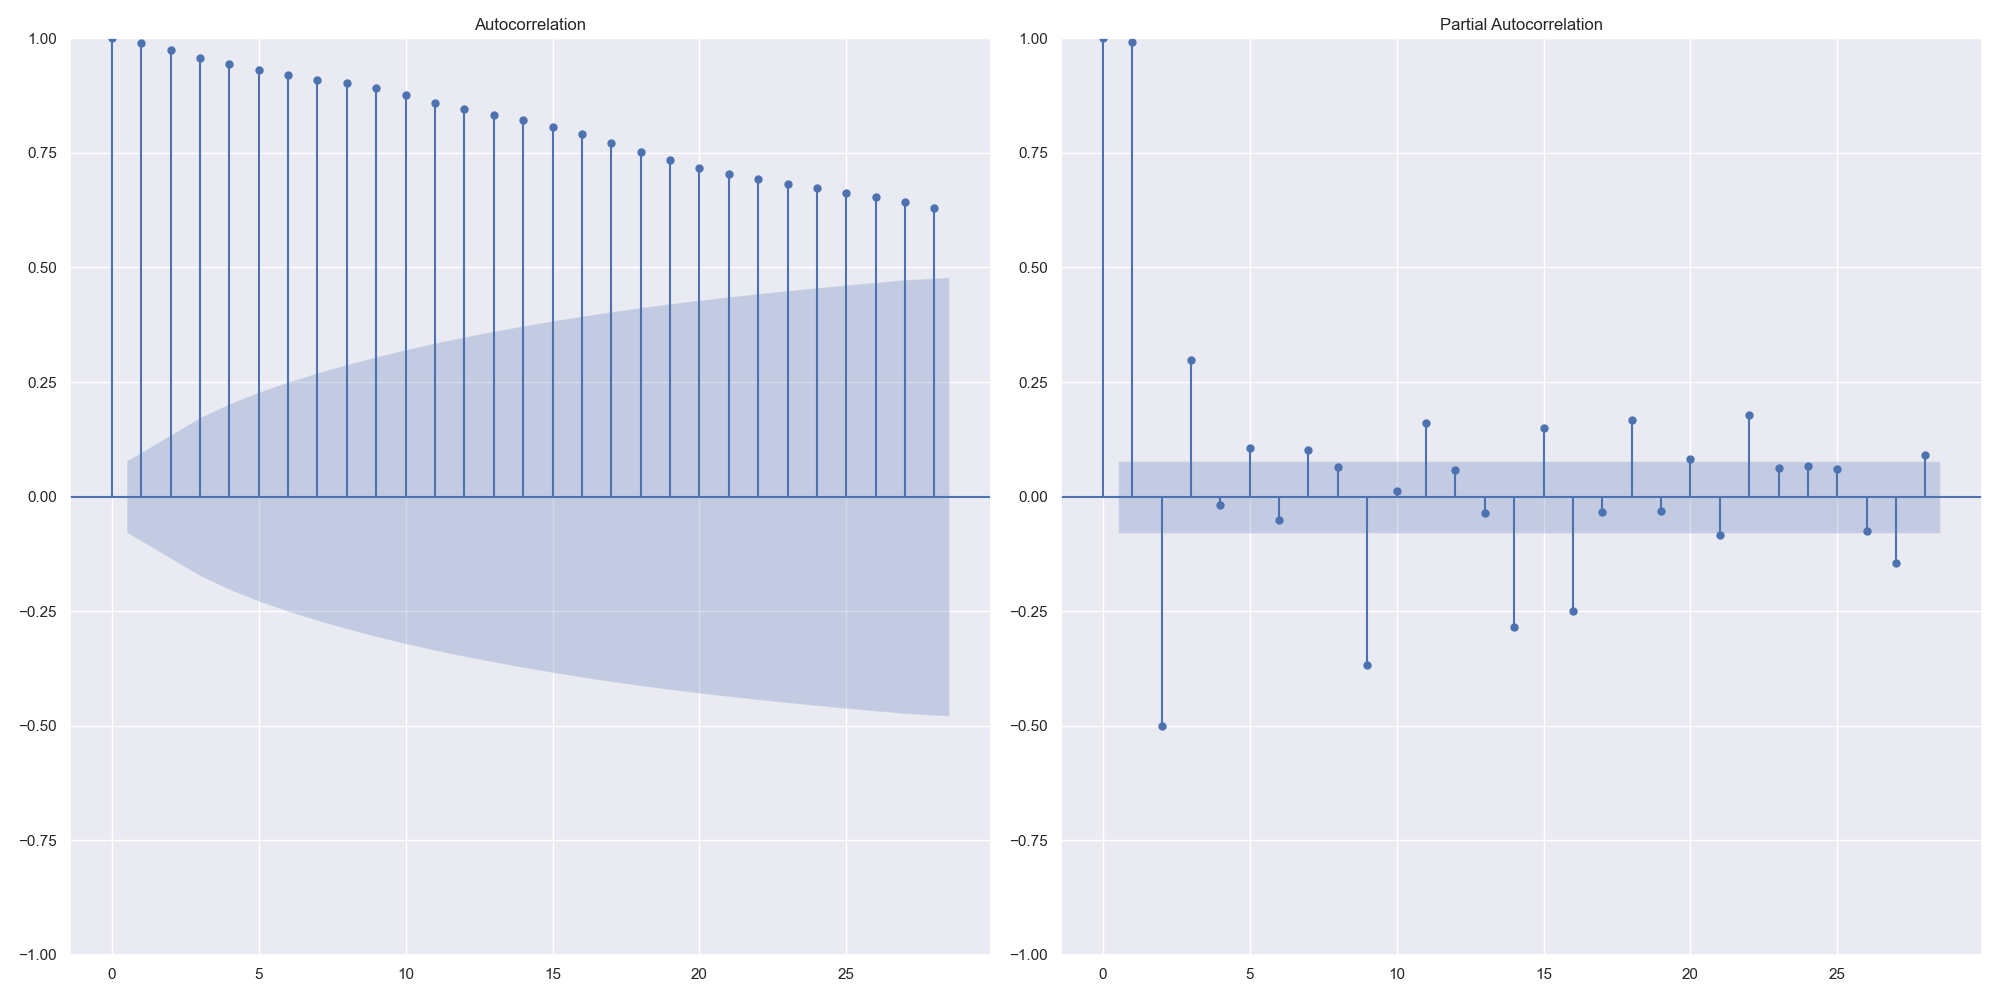
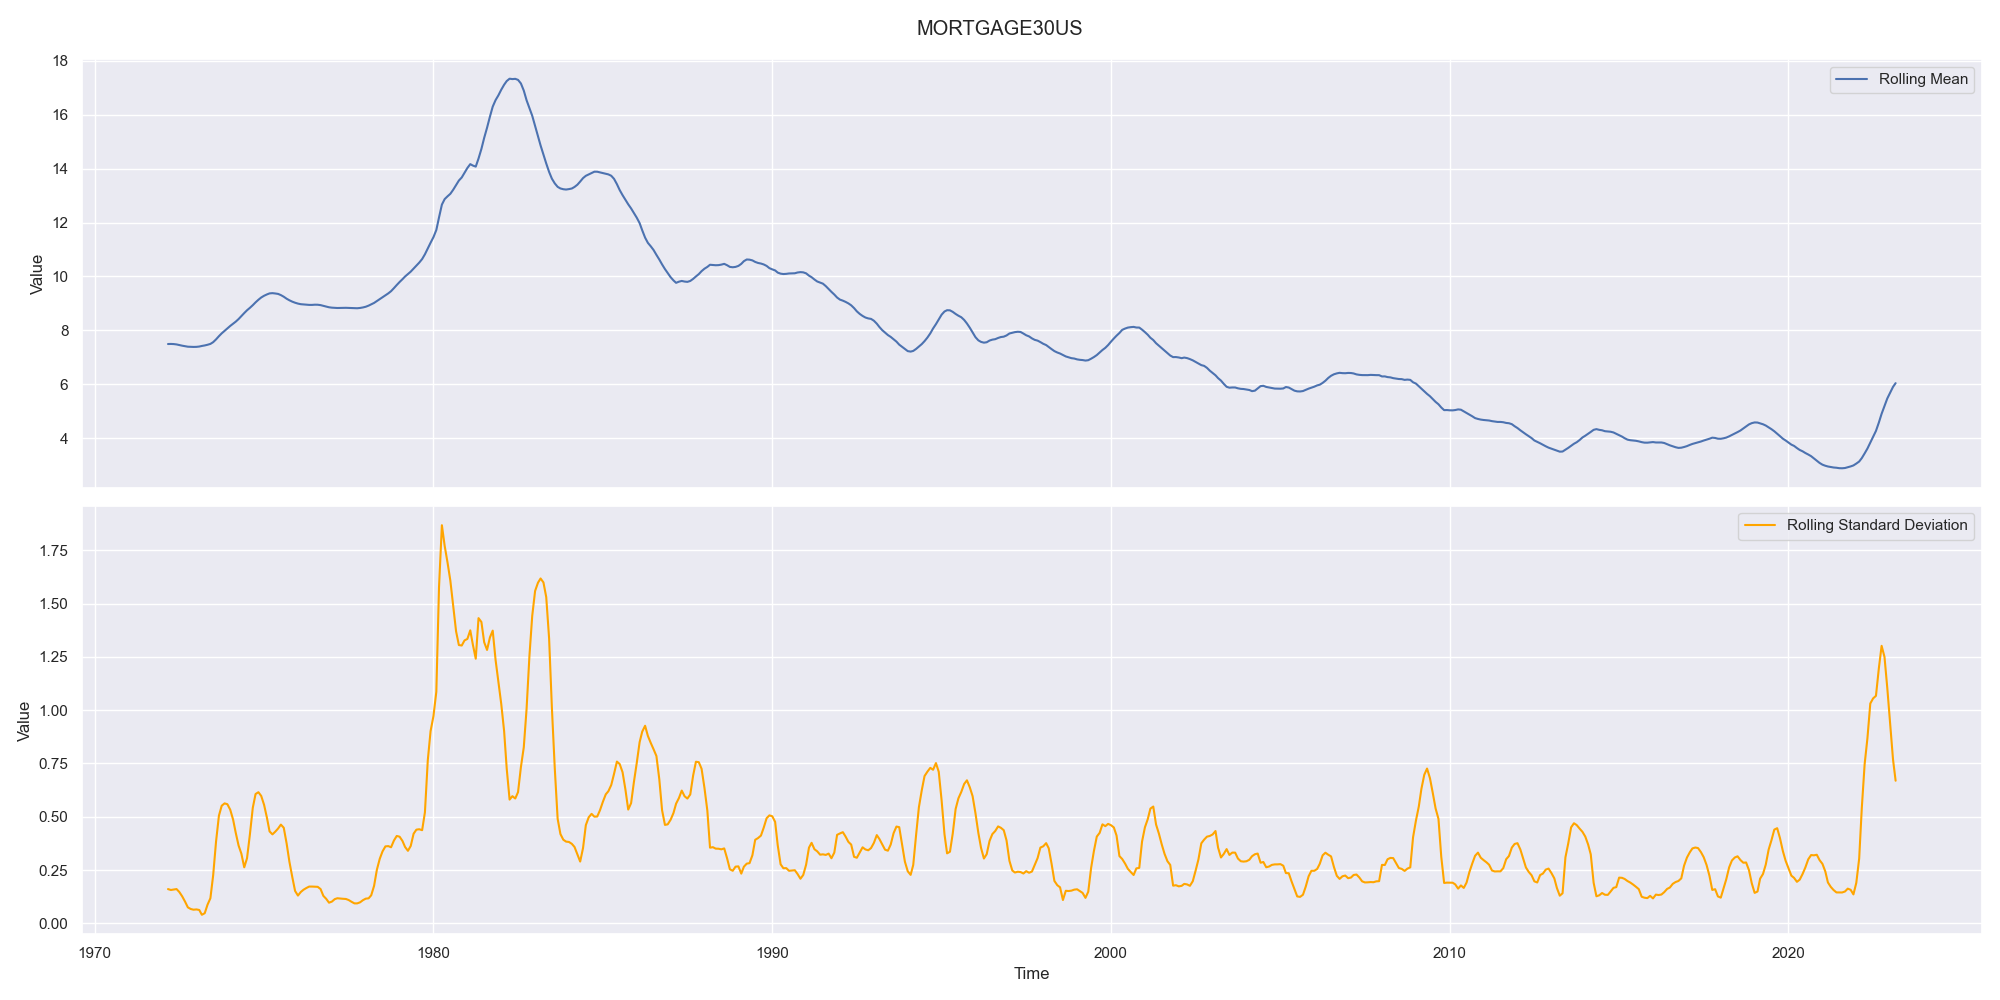
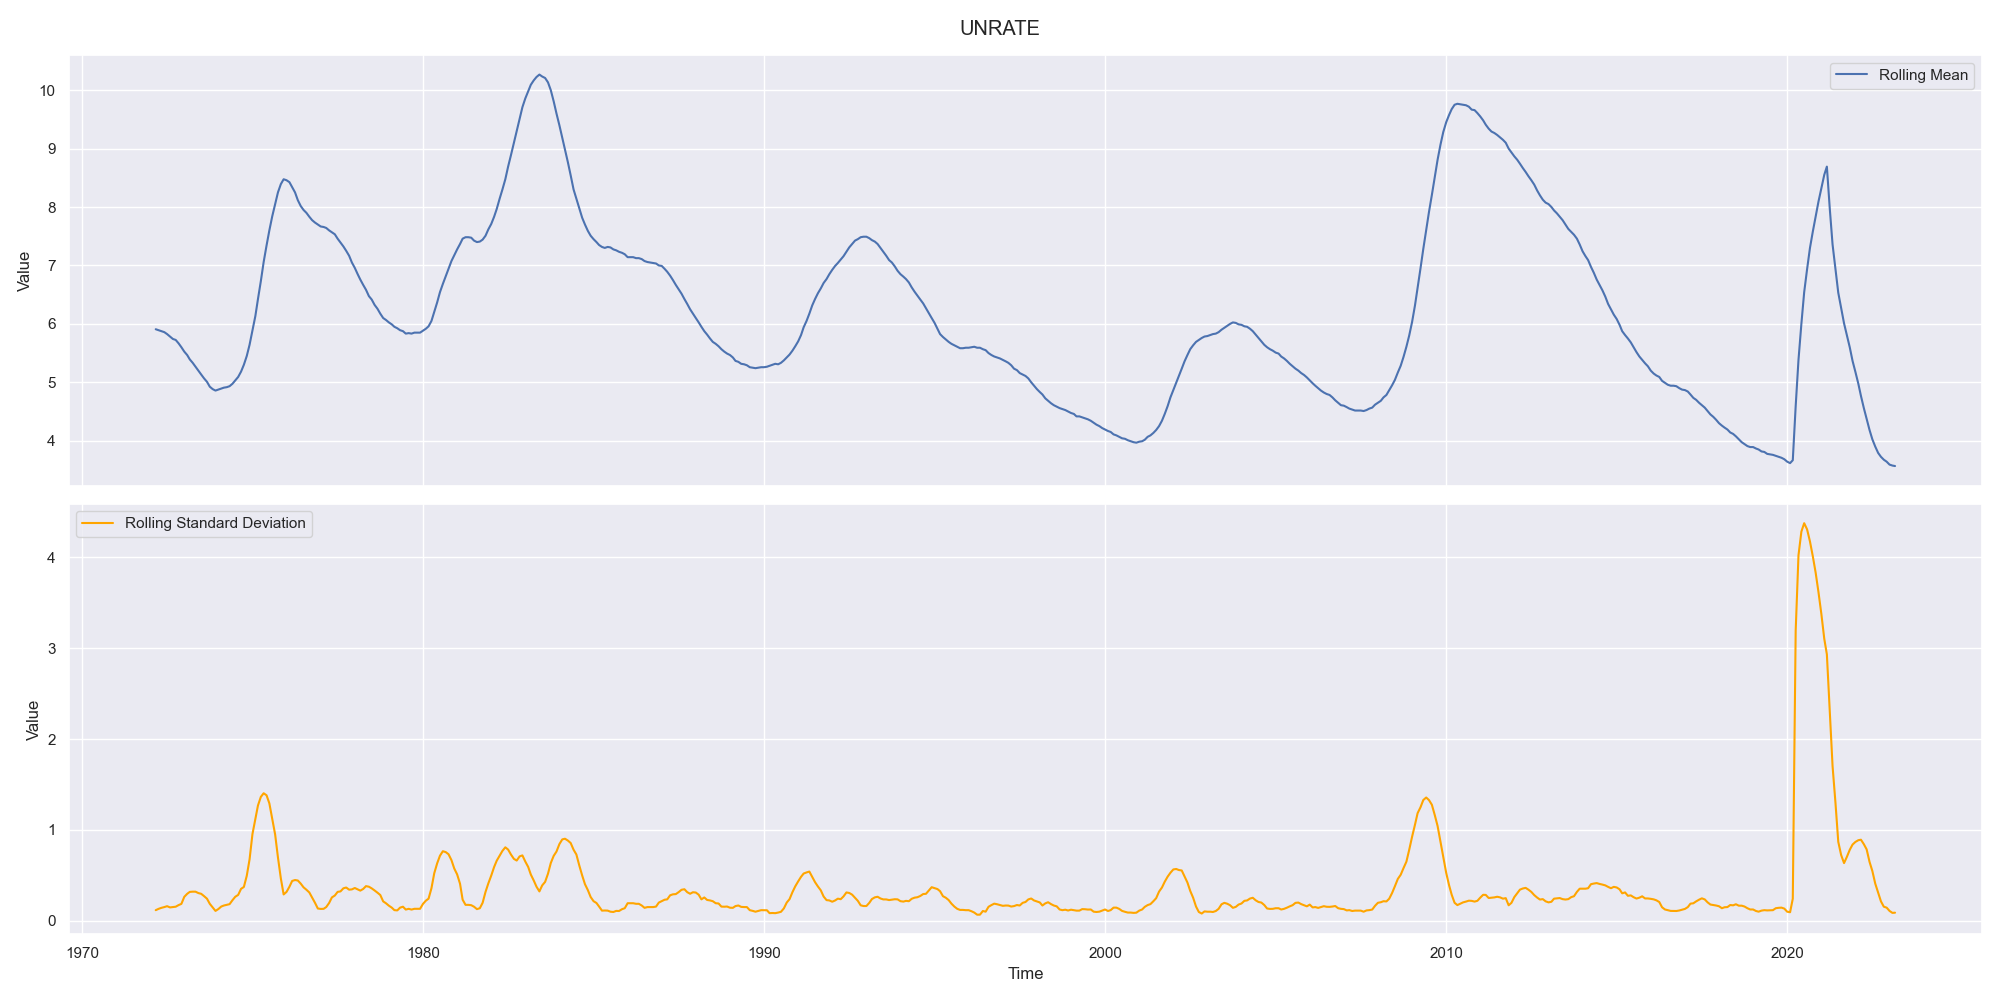
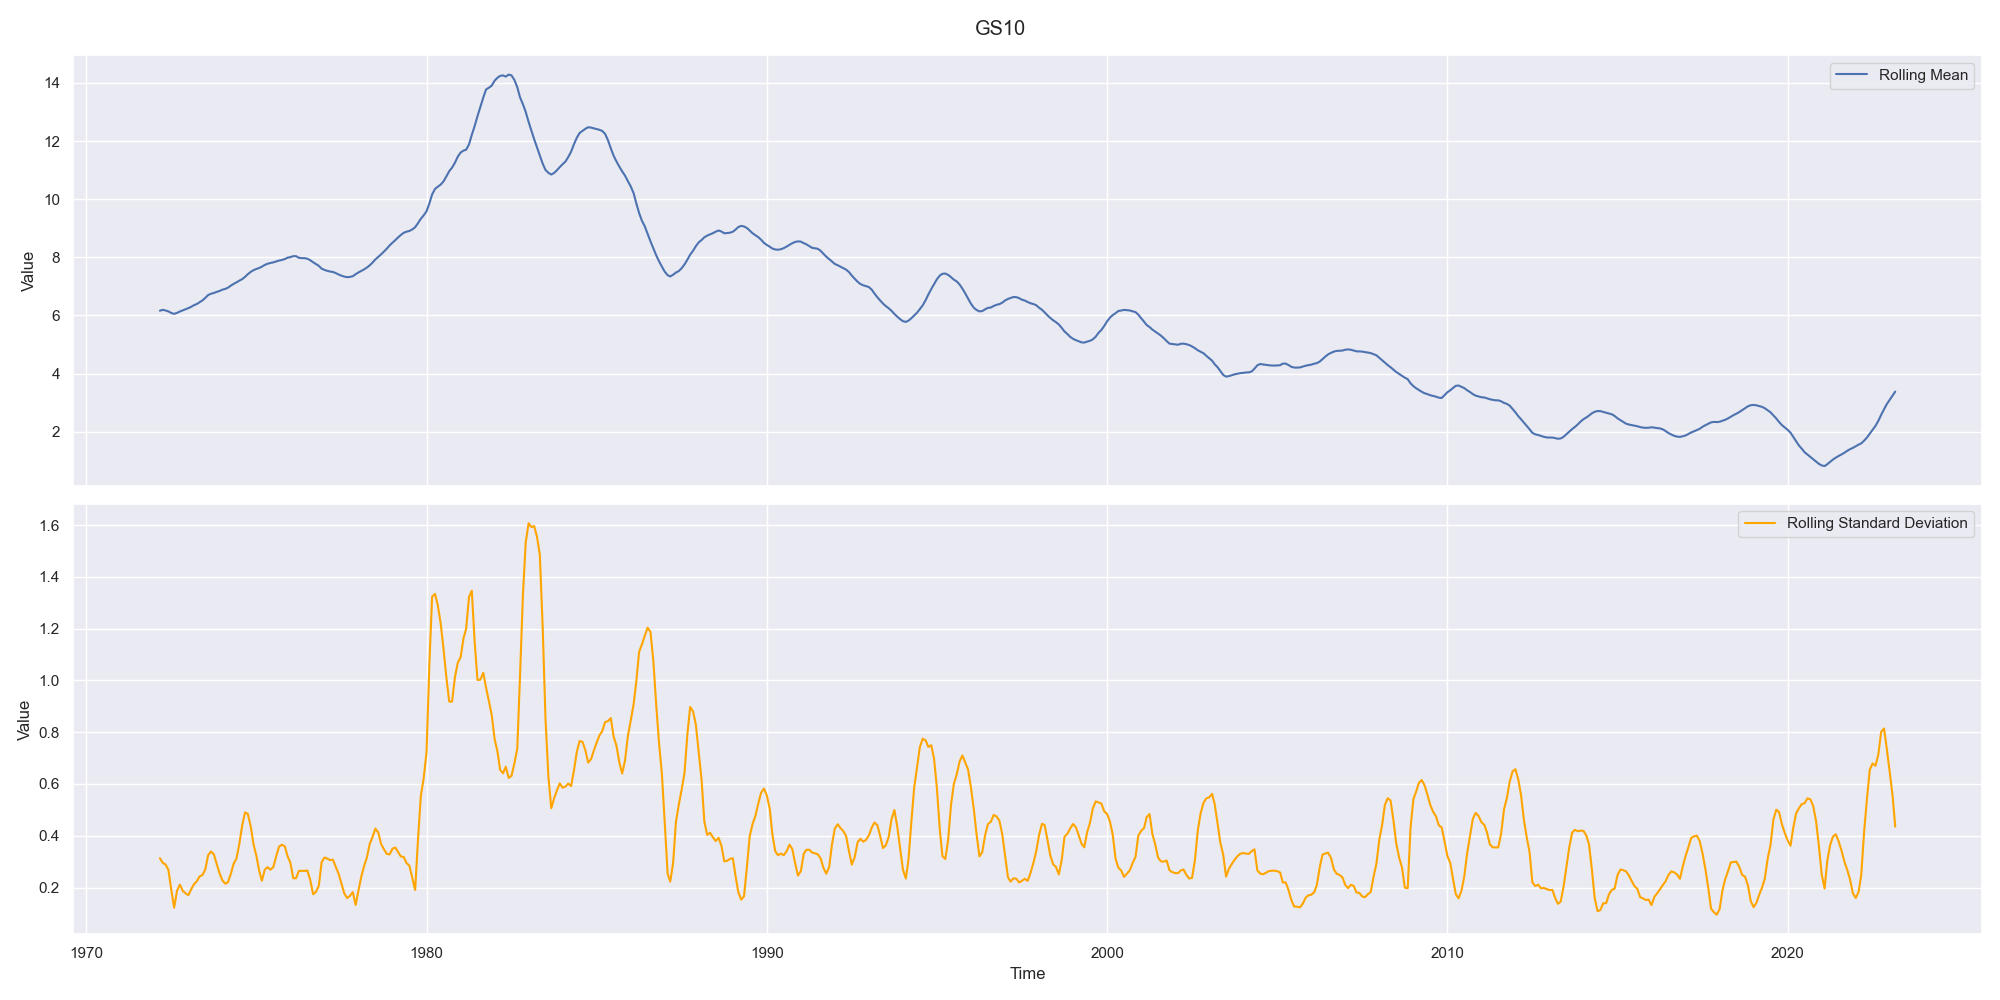
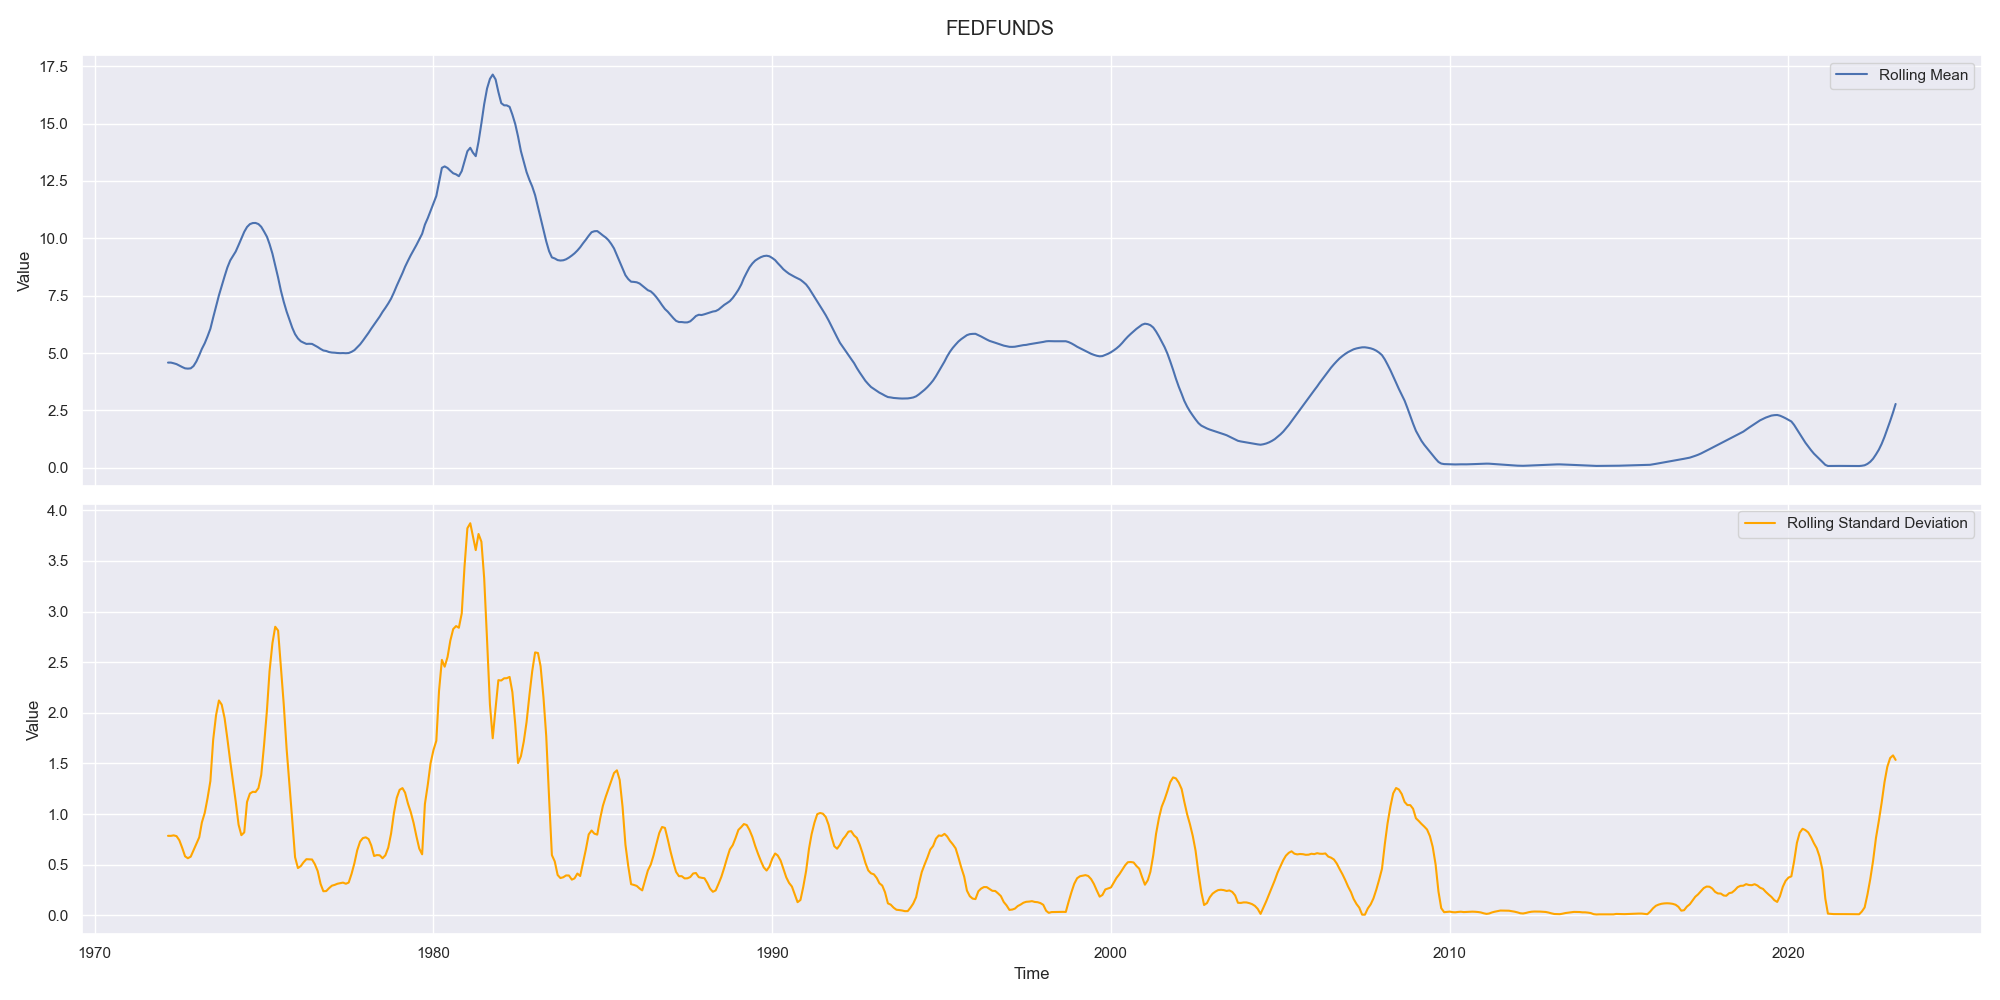

TimeSeriesUnivariate(test_context=TestContext(dataset=Dataset(raw_dataset=            MORTGAGE30US  UNRATE  GS10  FEDFUNDS
DATE                                            
1971-04-01          7.29     5.9  5.83      4.16
1971-05-01          7.46     5.9  6.39      4.63
1971-06-01          7.54     5.9  6.52      4.91
1971-07-01          7.69     6.0  6.73      5.31
1971-08-01          7.69     6.1  6.58      5.57
...                  ...     ...   ...       ...
2022-11-01          6.58     3.6  3.89      3.78
2022-12-01          6.42     3.5  3.62      4.10
2023-01-01          6.13     3.4  3.53      4.33
2023-02-01          6.50     3.6  3.75      4.57
2023-03-01          6.32     3.5  3.66      4.65

[624 rows x 4 columns], fields=[{'id': 'MORTGAGE30US', 'type': 'Numeric'}, {'id': 'UNRATE', 'type': 'Numeric'}, {'id': 'GS10', 'type': 'Numeric'}, {'id': 'FEDFUNDS', 'type': 'Numeric'}], sample=[{'id': 'head', 'data': [{'MORTGAGE30US': 7.29, 'UNRATE': 5.9, 'GS10': 5.83, 'FEDFUNDS': 4.16}

In [16]:
target_column = ['MORTGAGE30US']
feature_columns = ['UNRATE', 'GS10', 'FEDFUNDS']

test_plan_config = {
    "time_series_line_plot": {
        "columns": target_column + feature_columns
    },
    "time_series_histogram": {
        "columns": target_column + feature_columns
    },
    "acf_pacf_plot": {
        "columns": target_column + feature_columns
    },
    "auto_ar": {
        "max_ar_order": 3
    },
    "auto_ma": {
        "max_ma_order": 3
    },
    "seasonal_decompose": {
        "seasonal_model": 'additive',
         "fig_size": (40,30)
    },
    "auto_seasonality": {
        "min_period": 1,
        "max_period": 3
    },
      "auto_stationarity": {
        "max_order": 3,
        "threshold": 0.05
    },
      "rolling_stats_plot": {
        "window_size": 12    
    },
}

vm_dataset = vm.init_dataset(
    dataset=preprocessed_df,
    target_column="MORTGAGE30US"
)
vm.run_test_plan("time_series_univariate", config=test_plan_config, dataset=vm_dataset)

### Multivariate Analysis

#### Run Time Series Multivariate Test Plan

In [17]:
vm.test_plans.describe_plan("time_series_multivariate")

'<table>\n<thead>\n<tr><th>Attribute       </th><th>Value                                                                       </th></tr>\n</thead>\n<tbody>\n<tr><td>ID              </td><td>time_series_multivariate                                                    </td></tr>\n<tr><td>Name            </td><td>TimeSeriesMultivariate                                                      </td></tr>\n<tr><td>Description     </td><td>Test plan to perform time series multivariate analysis.                     </td></tr>\n<tr><td>Required Context</td><td>[&#x27;dataset&#x27;]                                                                 </td></tr>\n<tr><td>Tests           </td><td>ScatterPlot (Metric), LaggedCorrelationHeatmap (Metric), SpreadPlot (Metric)</td></tr>\n<tr><td>Test Plans      </td><td>[]                                                                          </td></tr>\n</tbody>\n</table>'


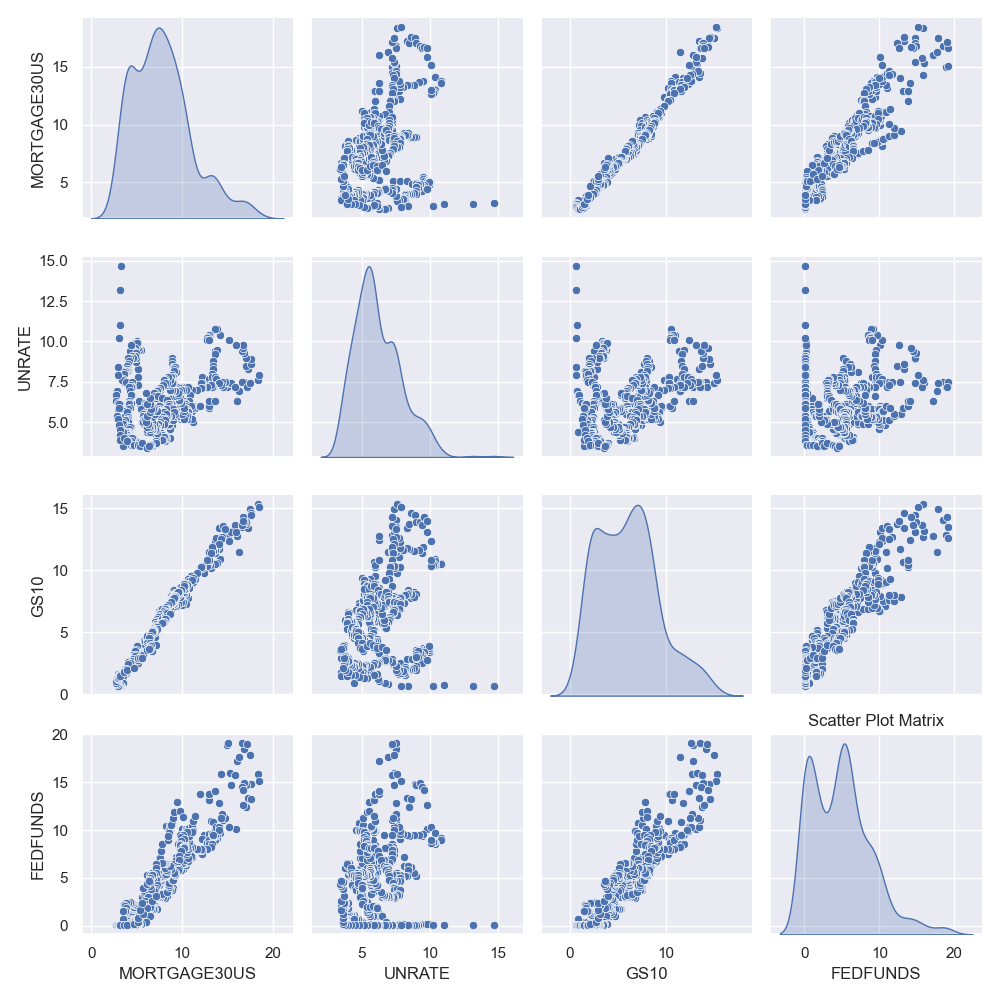
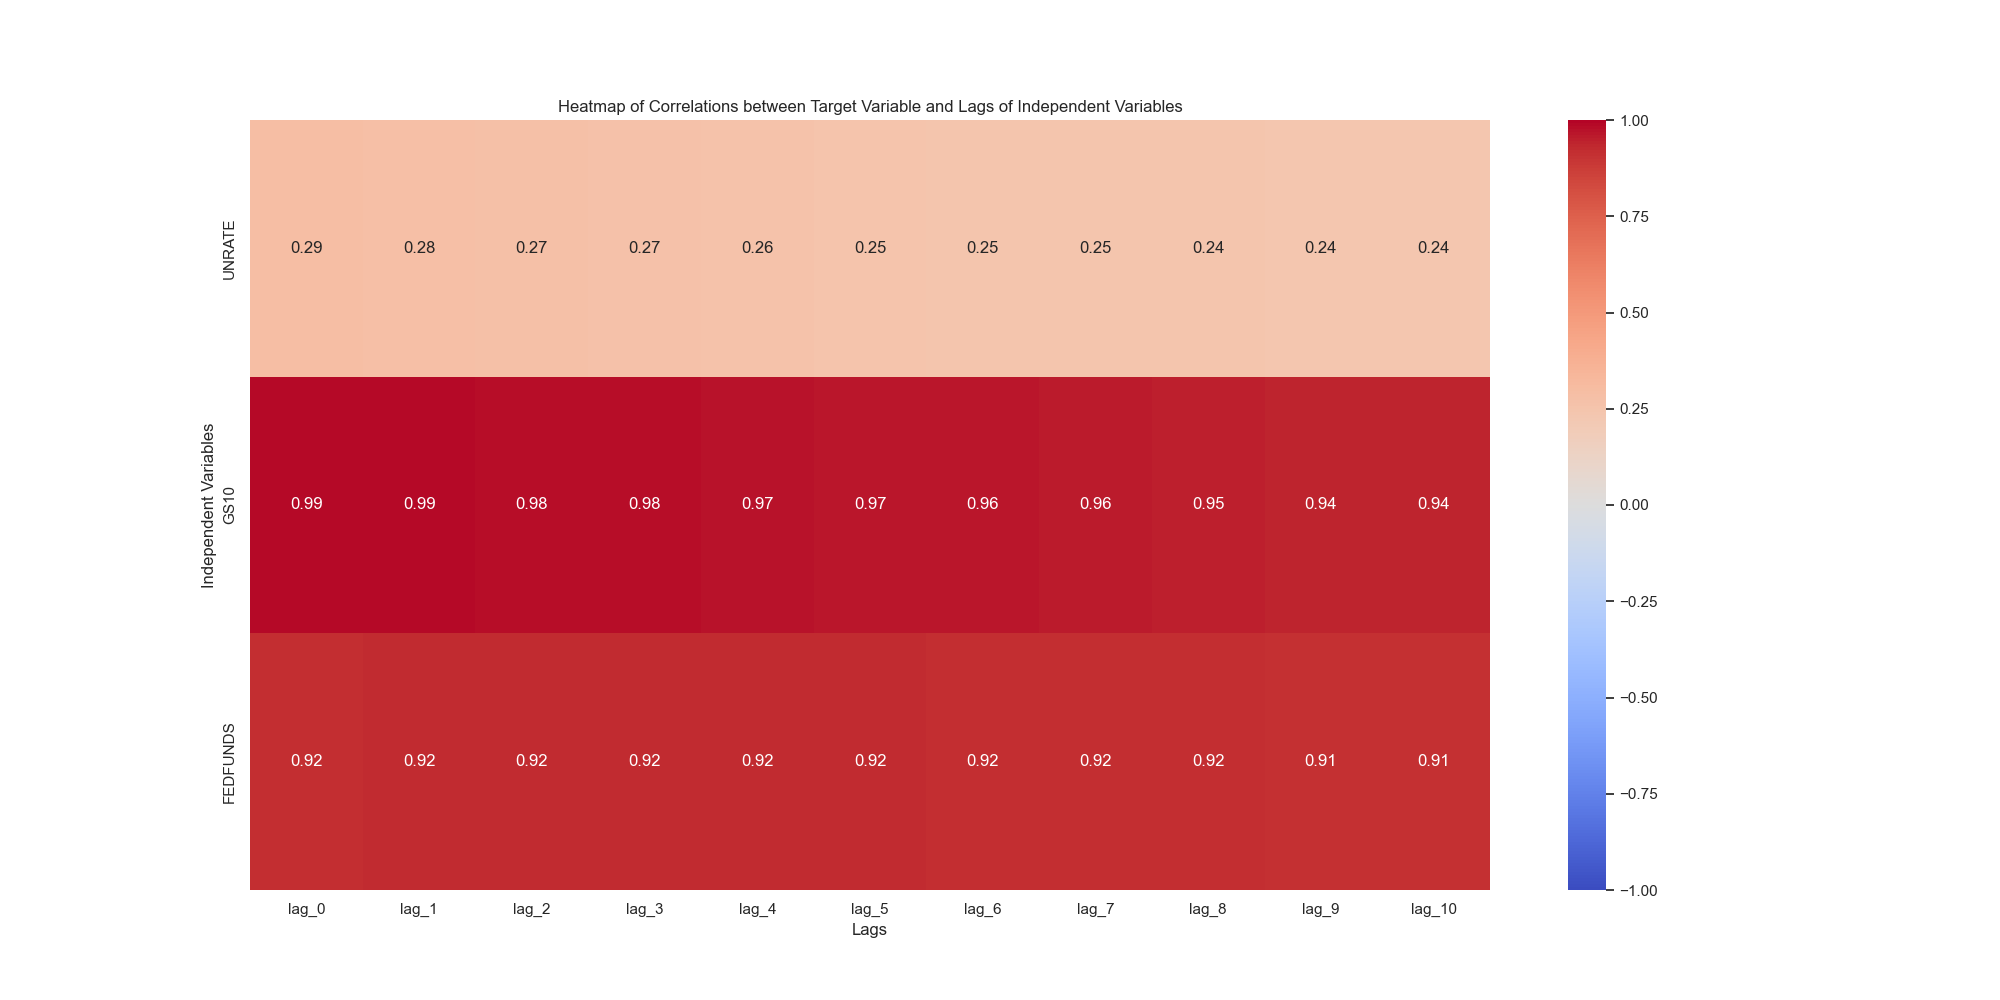
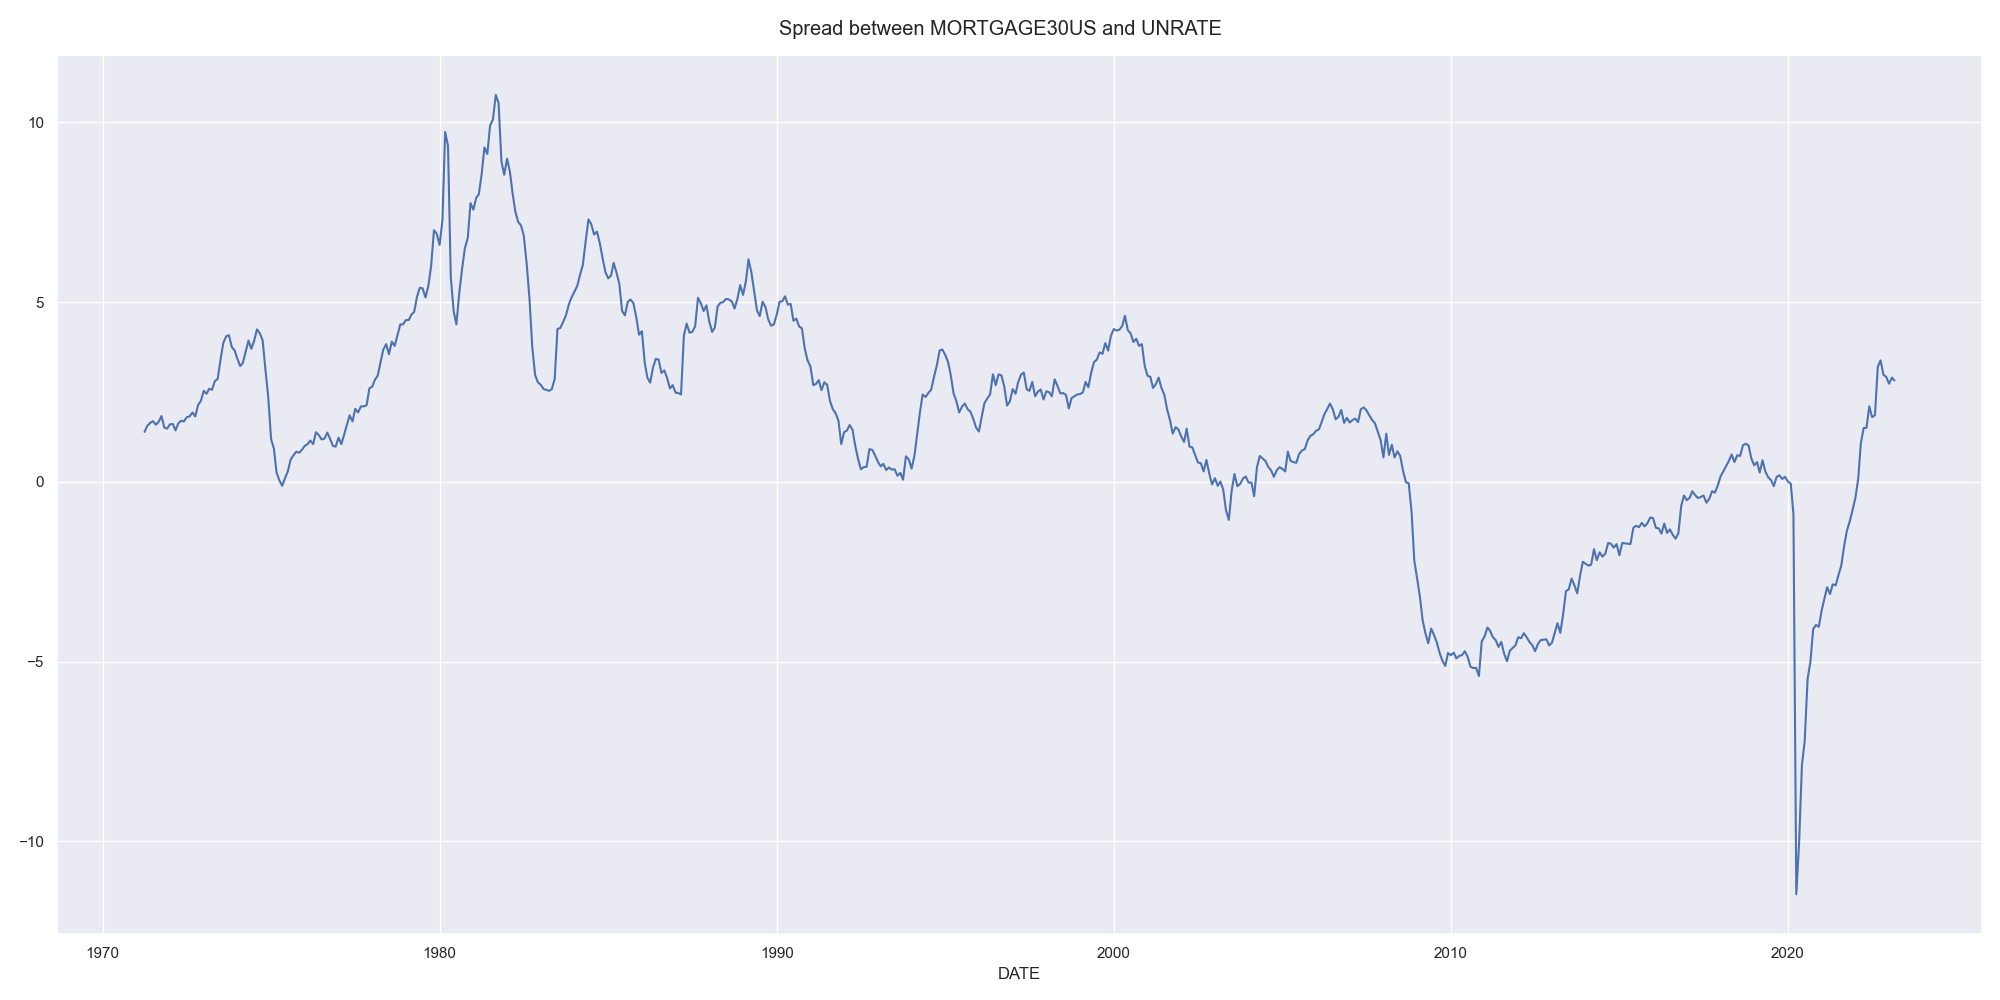
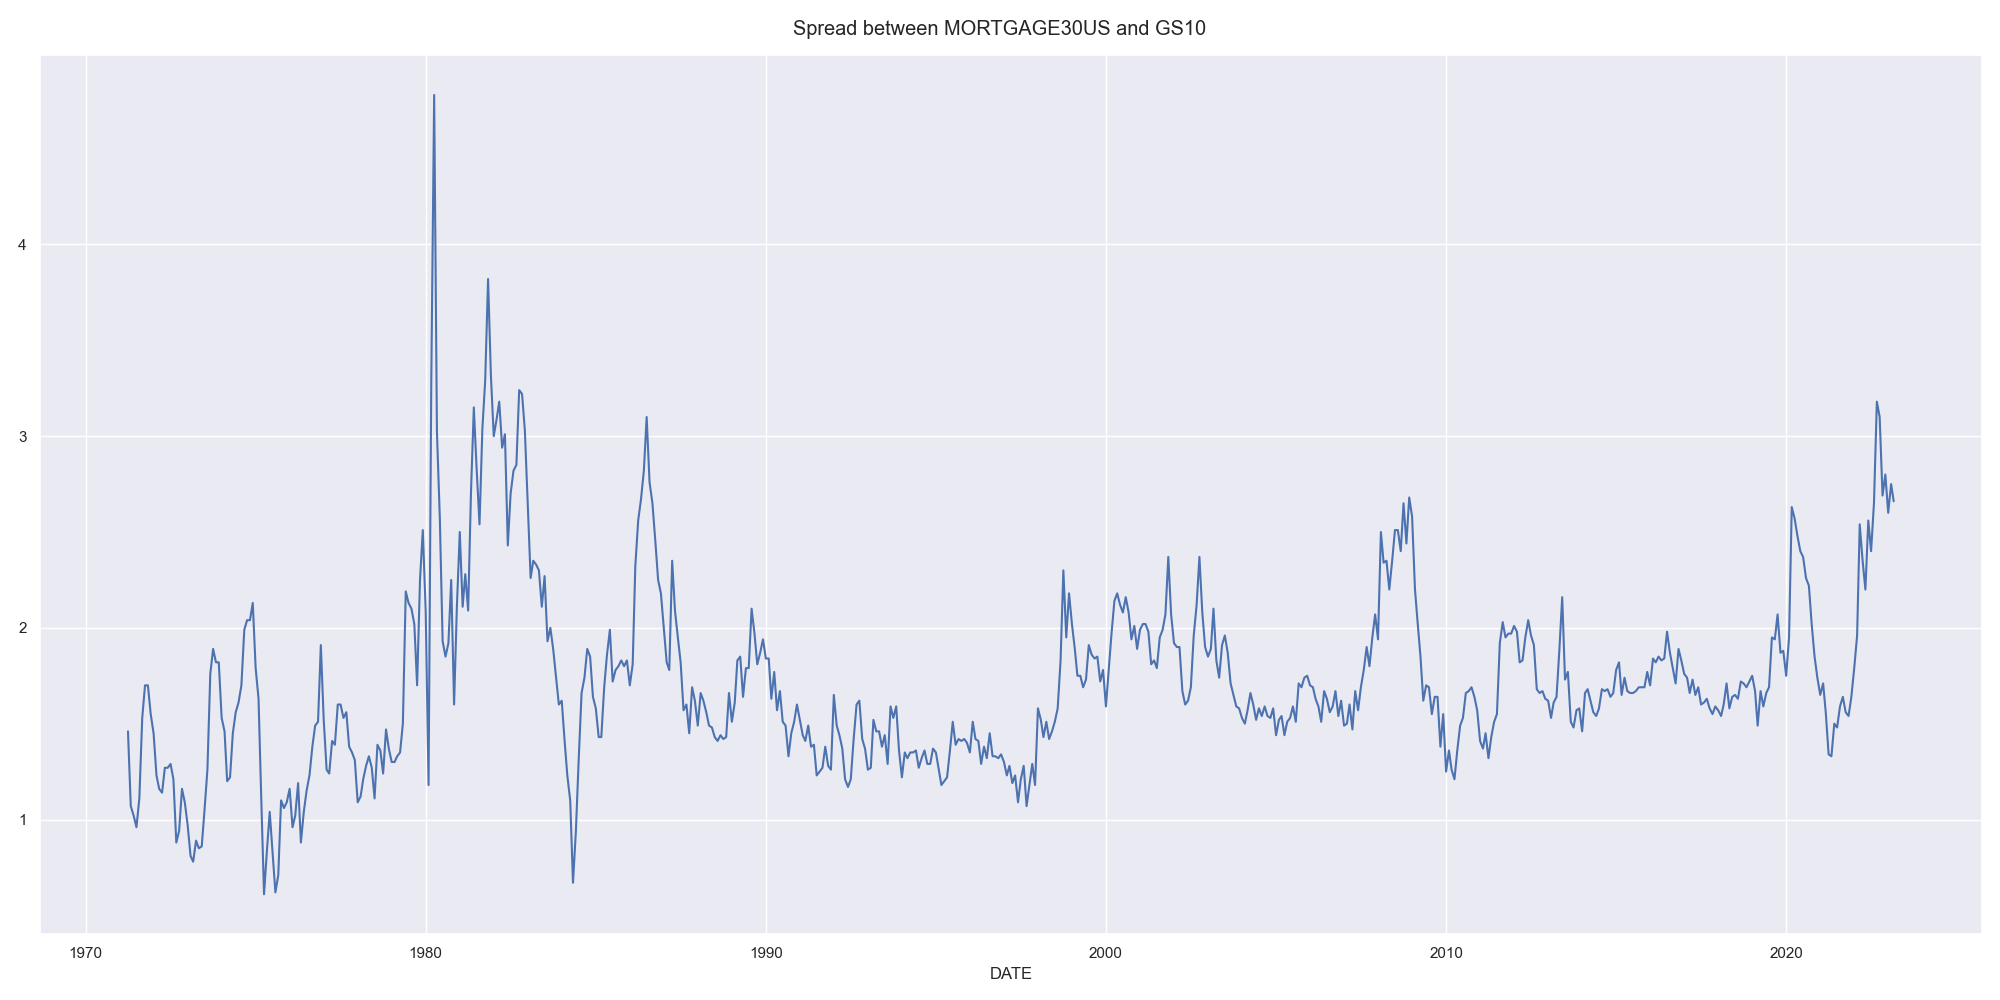
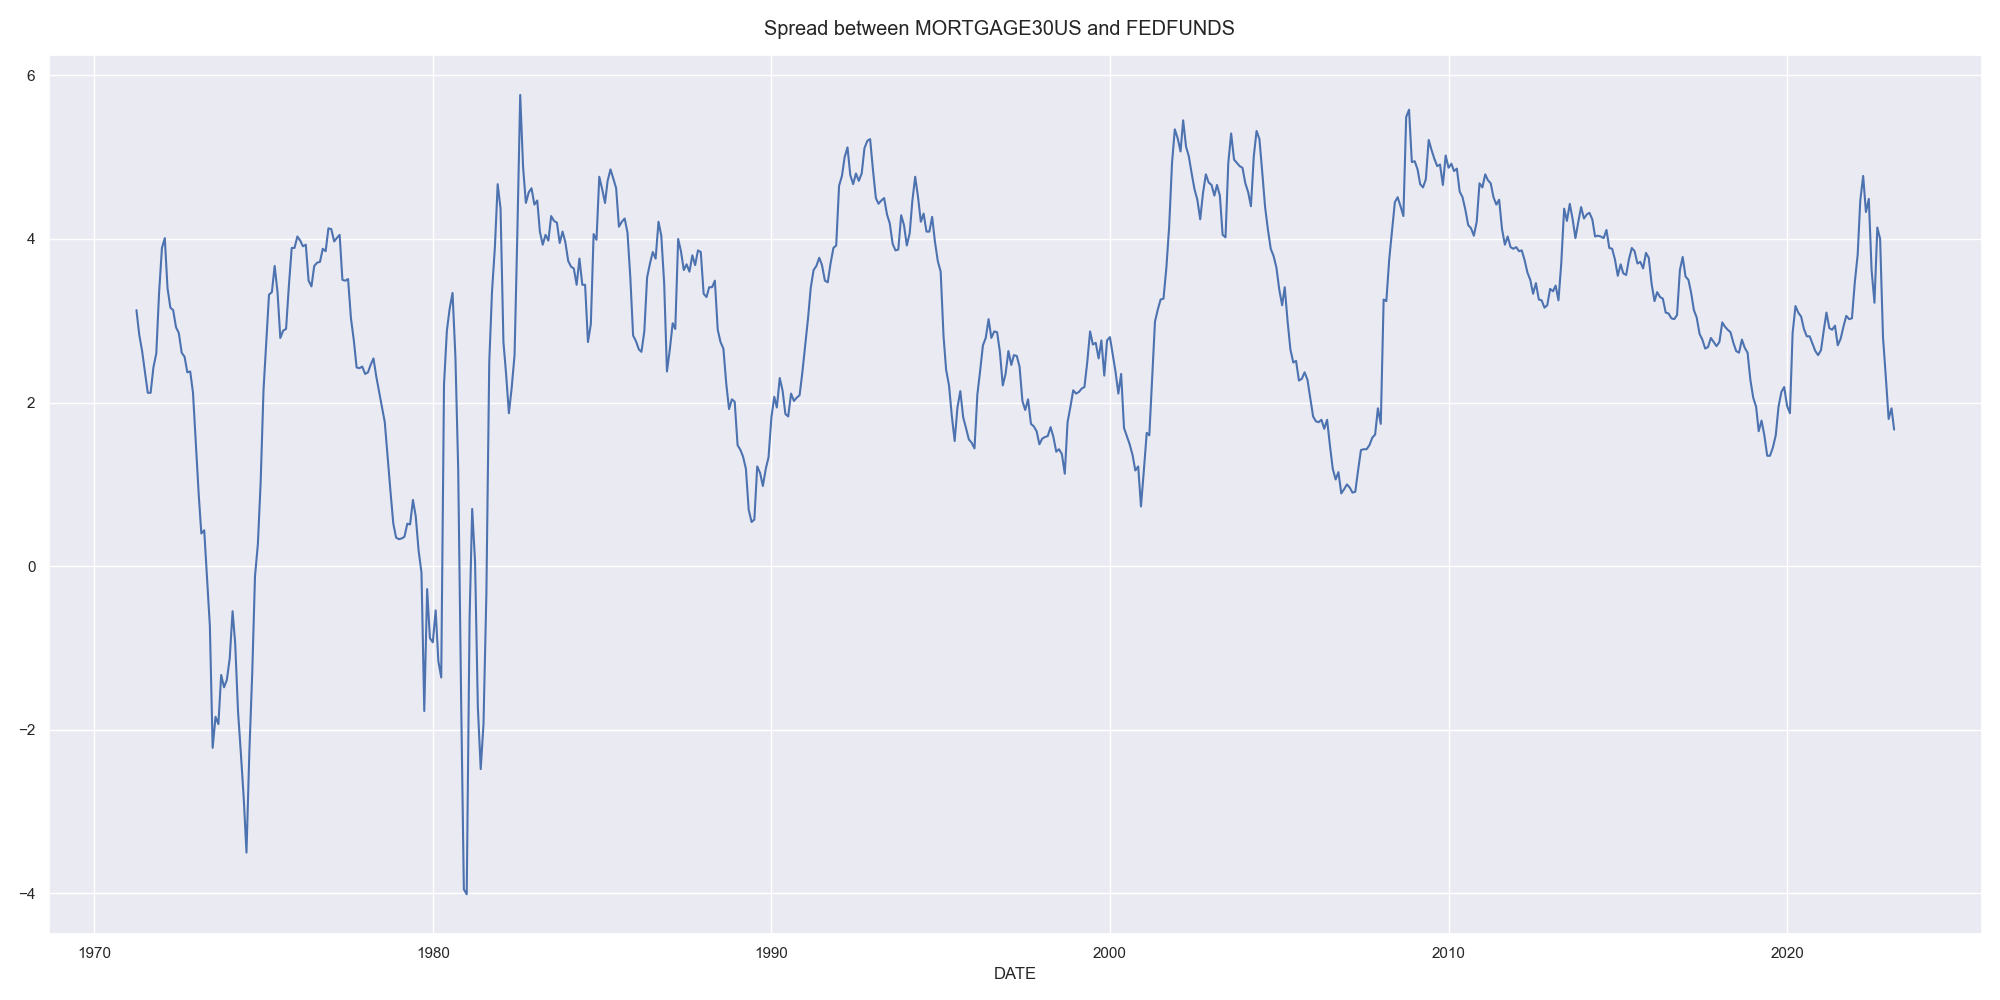
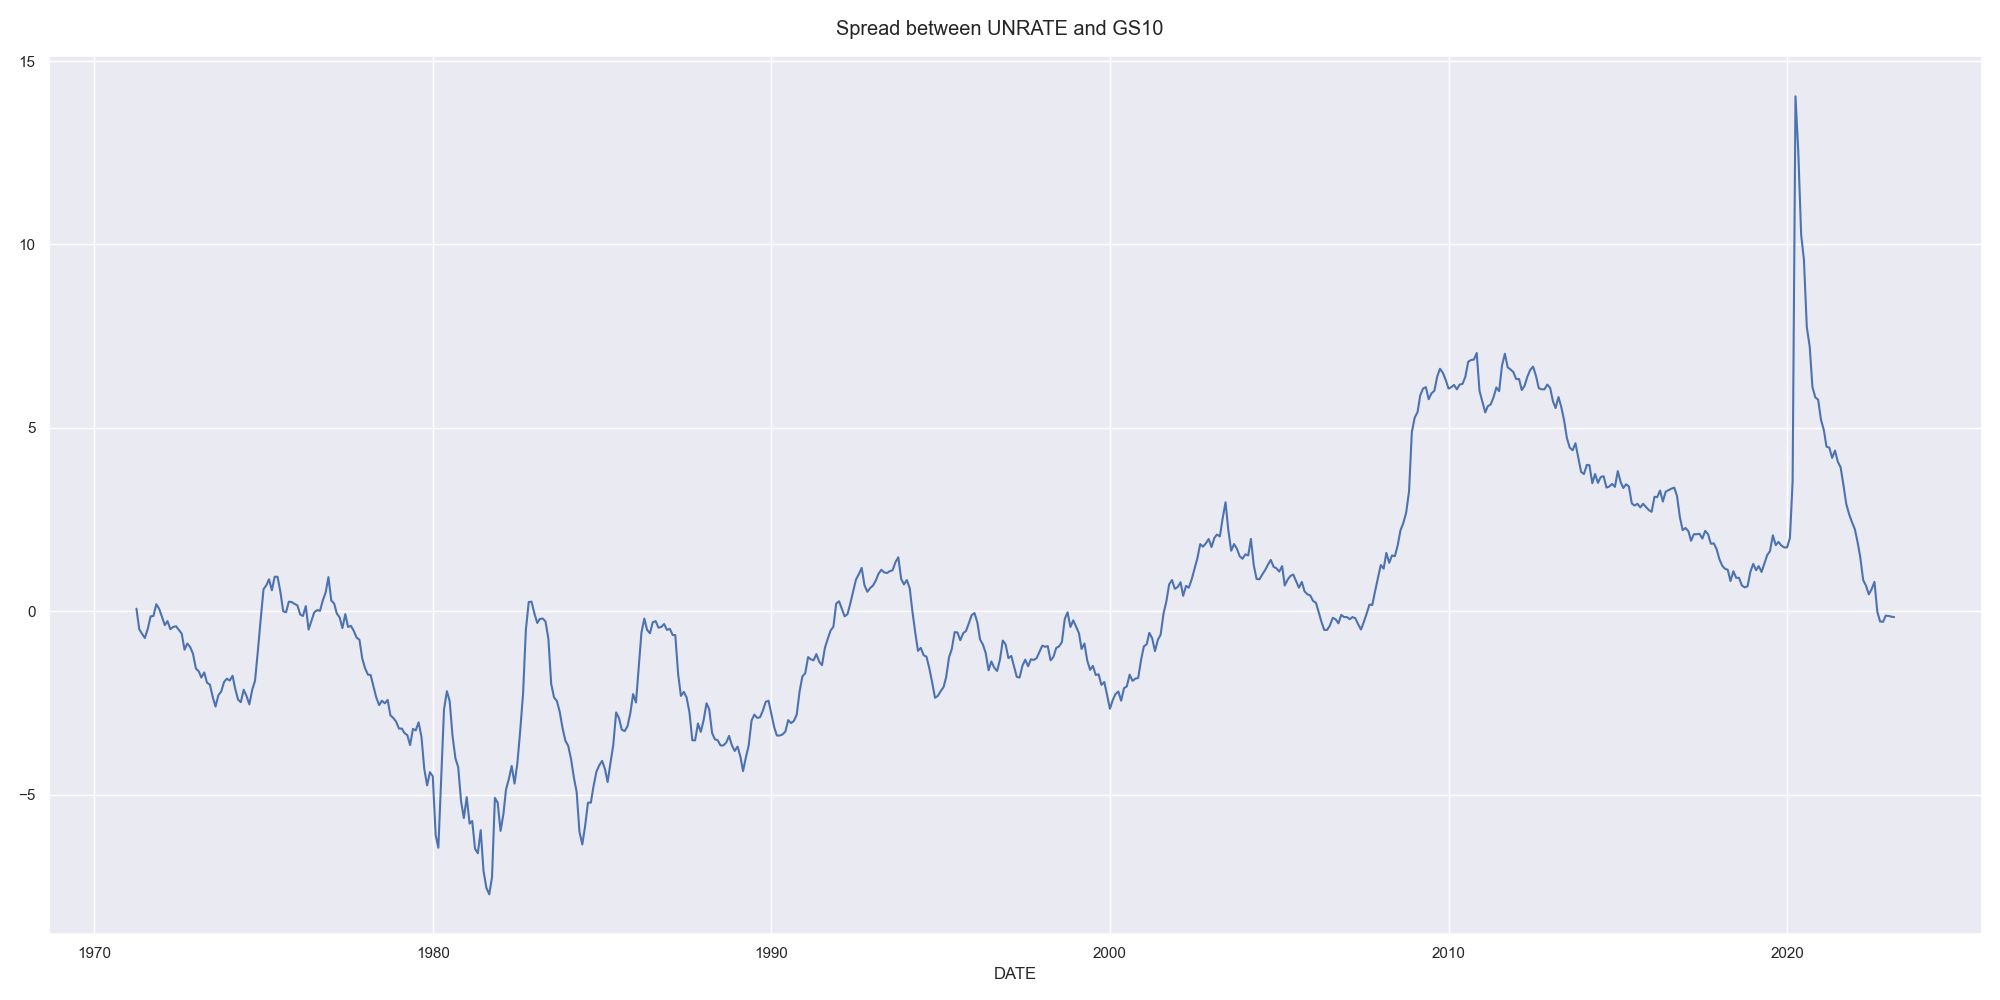
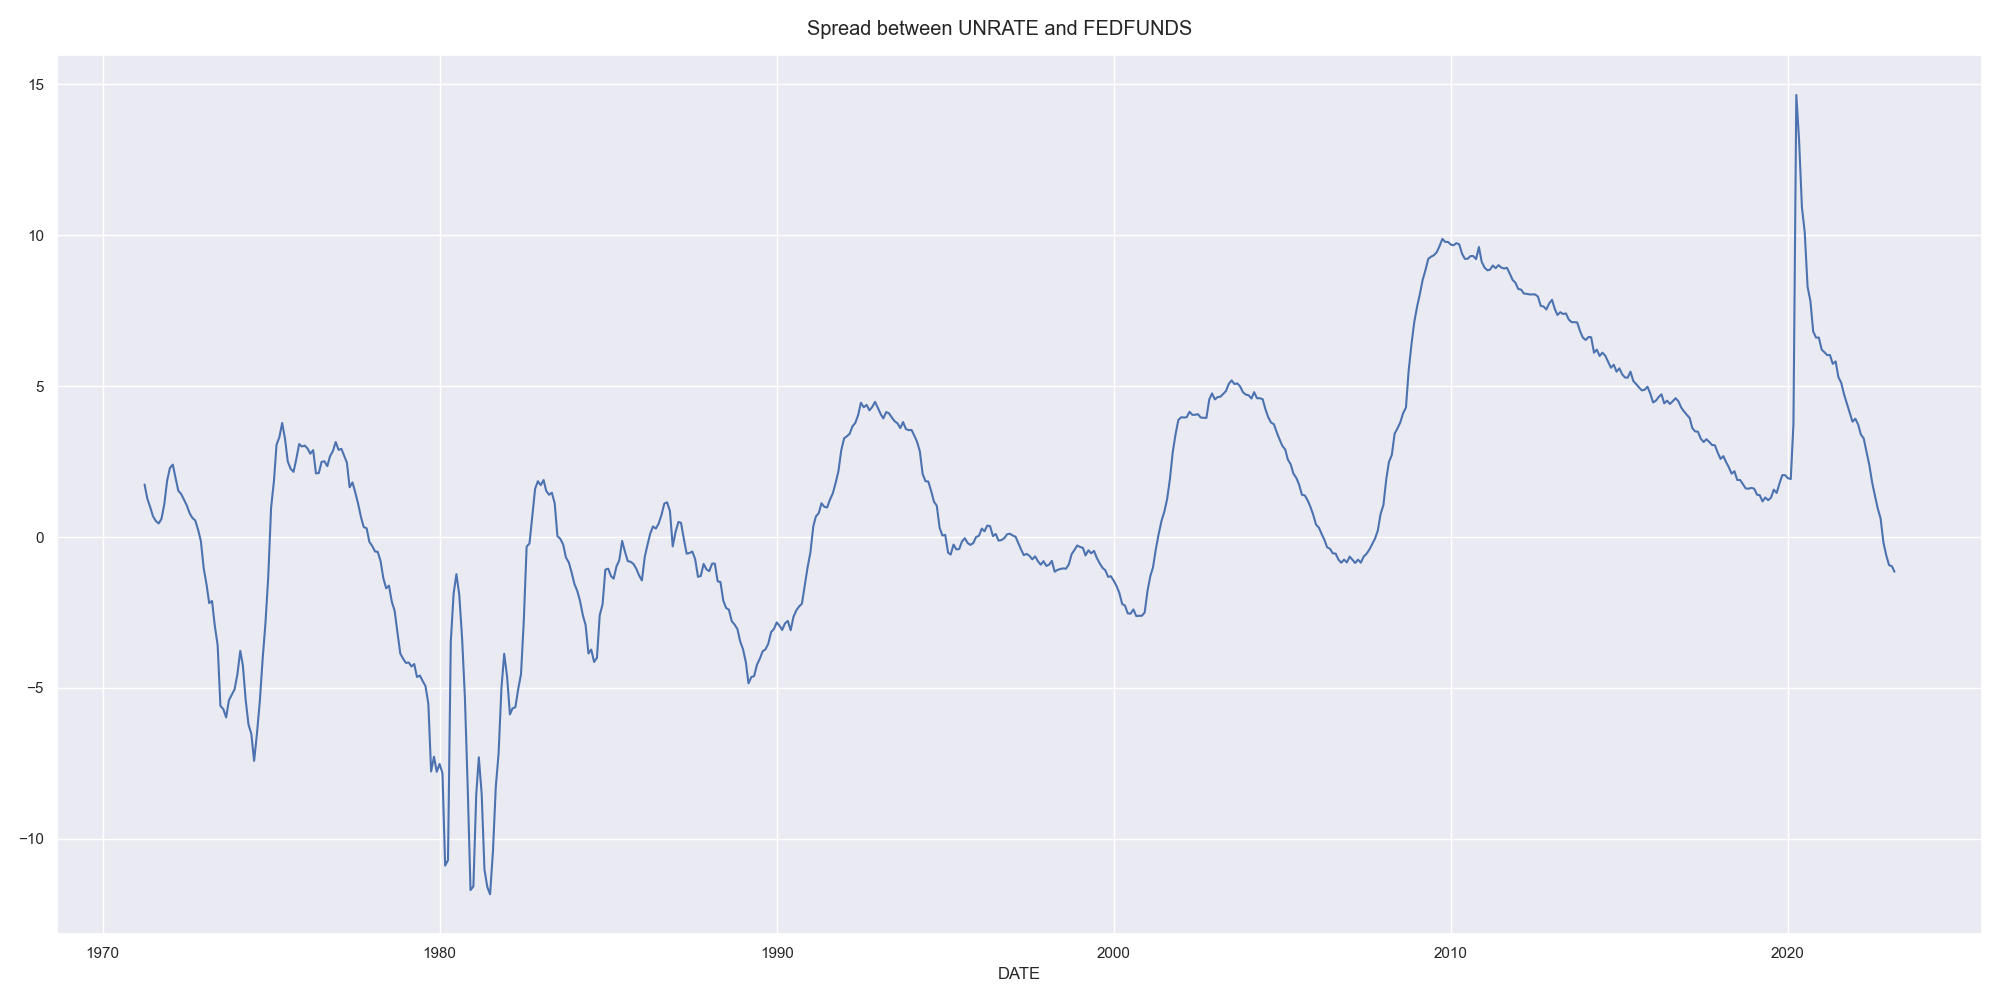
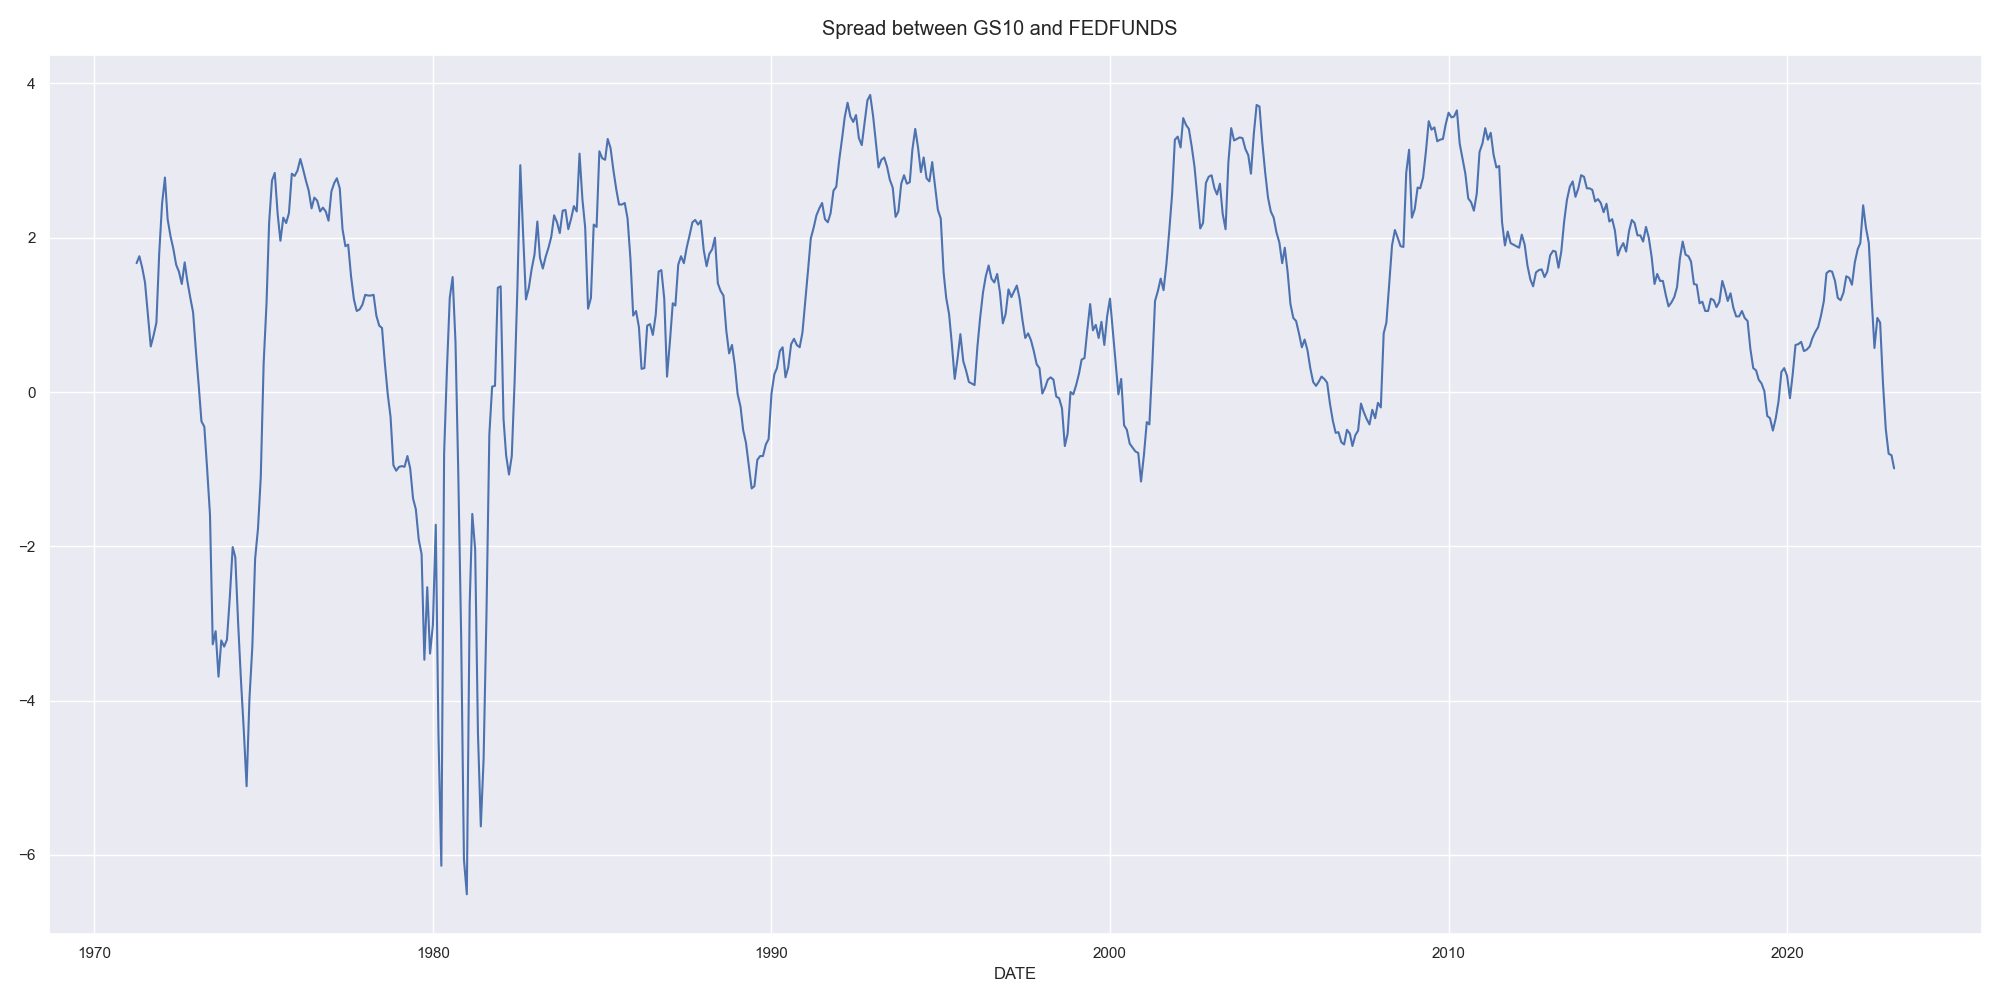

TimeSeriesMultivariate(test_context=TestContext(dataset=Dataset(raw_dataset=            MORTGAGE30US  UNRATE  GS10  FEDFUNDS
DATE                                            
1971-04-01          7.29     5.9  5.83      4.16
1971-05-01          7.46     5.9  6.39      4.63
1971-06-01          7.54     5.9  6.52      4.91
1971-07-01          7.69     6.0  6.73      5.31
1971-08-01          7.69     6.1  6.58      5.57
...                  ...     ...   ...       ...
2022-11-01          6.58     3.6  3.89      3.78
2022-12-01          6.42     3.5  3.62      4.10
2023-01-01          6.13     3.4  3.53      4.33
2023-02-01          6.50     3.6  3.75      4.57
2023-03-01          6.32     3.5  3.66      4.65

[624 rows x 4 columns], fields=[{'id': 'MORTGAGE30US', 'type': 'Numeric'}, {'id': 'UNRATE', 'type': 'Numeric'}, {'id': 'GS10', 'type': 'Numeric'}, {'id': 'FEDFUNDS', 'type': 'Numeric'}], sample=[{'id': 'head', 'data': [{'MORTGAGE30US': 7.29, 'UNRATE': 5.9, 'GS10': 5.83, 'FEDFUNDS': 4.1

In [18]:
test_plan_config = {
    "scatter_plot": {
        "columns": target_column + feature_columns
    },
    "lagged_correlation_heatmap": {
        "target_col": target_column,
        "independent_vars": feature_columns
    },
    "engle_granger_coint": {
        "threshold": 0.05
    },
}

vm.run_test_plan("time_series_multivariate", config=test_plan_config, dataset=vm_dataset)